In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
#Parameters: df, observation
# ---------------------------
#df: pandas dataframe of specific observation
#observation: (string) observation identity
#returns list of string sample urls to be passed into the front end

def get_img_url(df, observation):
    indexes = []
    samples_url = []
    blockn = []
    for row in df.itertuples():
        indexes += [row[1]]
        blockn += [row[4]]
    for i in range(0, len(indexes)):
        samples_url += ["https://storage.cloud.google.com/bl-scale/"+observation+"/filtered/"+str(blockn[i])+"/"+str(indexes[i])+".png"]
    return samples_url

# Observation 1 #

In [98]:
ob1 = pd.read_pickle("GBT_58010_50176_HIP61317_fine_info_df.pkl")
ob1

,index,statistic,pvalue,block_num,freqs
0,293934880,2620.947874,0.0,10,1105.024964
1,293934980,2610.975097,0.0,10,1105.024684
2,294674856,2803.820002,0.0,10,1102.957495
3,294674956,2817.098345,0.0,10,1102.957215
4,294675956,3459.241837,0.0,10,1102.954421
...,...,...,...,...,...
48746,173316040,4375.880966,0.0,5,1442.030109
48747,173345540,6043.474685,0.0,5,1441.947687
48748,173345640,6030.741055,0.0,5,1441.947408
48749,173345740,6050.013608,0.0,5,1441.947129


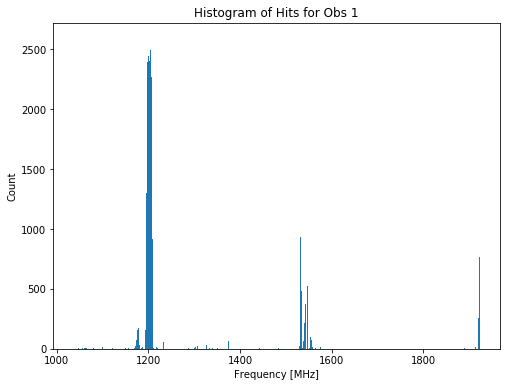

In [7]:
plt.figure(figsize=(8,6))
plt.hist(ob1["freqs"], bins = np.arange(min(ob1["freqs"]),max(ob1["freqs"]), 0.8116025973))

plt.title("Histogram of Hits for Obs 1")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Count")

import base64
import io 
pic_IObytes = io.BytesIO()
plt.savefig(pic_IObytes,  format='png')
pic_IObytes.seek(0)
pic_hash = base64.b64encode(pic_IObytes.read())

In [160]:
pic_hash

b'iVBORw0KGgoAAAANSUhEUgAAAkAAAAGwCAYAAABB4NqyAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nO3df1iUZaL/8c8IaRqikULgoEBD/kCREPzRD60UKVupzFBjUxfLjtXa5mp5tmOppbKZZavWibOW6JqUnVWOpaJZtm1pSGldaeWkYogclPAHuIqiz/cPT89XBAwVZ8D7/bqurkvumWfmfu6mePs8z8w4LMuyBAAAYJBG3p4AAACApxFAAADAOAQQAAAwDgEEAACMQwABAADjEEAAAMA4BBAAADAOAQQAAIxDAAEAAOMQQAAAwDgEEAAAMA4BBAAAjEMAAQAA4xBAAADAOAQQAAAwDgEEAACMQwABAADjEEAAAMA4BBAAADAOAQQAAIxDAAEAAOMQQAAAwDgEEAAAMA4BBAAAjEMAAQAA4xBAAADAOAQQAAAwDgEEAACMQwABAADjEEAAAMA4BBAAADAOAQQAAIxDAAEAAOMQQAAAwDgEEAAAMA4BBHhIVFSU1q9f7+1peNWyZcsUGhoqPz8/bd68+YIew8/PTzt37rzouRw9elQDBw5UixYtdP/991/049VWWFiYPvzwQ489H4DqEUBAHajul9qCBQt088032z9v3bpVt9566zkfJy8vTw6HQxUVFZdiml43fvx4zZ07V2VlZbrhhhuq3O5wOPTjjz9WGps8ebJ++9vf2j+XlZUpIiJCkjRy5Ej9x3/8xwXN5b333lNRUZF+/vlnLV269IIe42wHDx7UmDFjdO2116pZs2bq0qWL3nrrrTp57LNNmjRJXbp0ka+vryZPnlzl9rffflvt2rXTVVddpXvuuUclJSWXZB5AQ0UAAQbxdljt3r1bUVFRXp3DL3

In [107]:
#Filter to freq range between 1000 and 1400
freq_1000_1400_1 = ob1[(ob1["freqs"] >= 1000) & (ob1["freqs"] <= 1400)]

#Find the mean statistic within this range
mean_stat_1000_1400_1 = np.mean(freq_1000_1400_1["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1000_1400_1 = np.std(freq_1000_1400_1["statistic"])

#The most extreme samples, greater than 6 standard deviations from mean statistic
extr_1000_1400_1 = freq_1000_1400_1[freq_1000_1400_1["statistic"] >= 8*std_stat_1000_1400_1]
extr_1000_1400_1

,index,statistic,pvalue,block_num,freqs
202,214455504,7110.715401,0.0,7,1327.087775
203,214455604,7104.977478,0.0,7,1327.087495
8722,197309688,7075.218730,0.0,6,1374.992631
8723,197309788,7077.125831,0.0,6,1374.992352
9533,268371580,6766.165945,0.0,9,1176.447999
9534,268371680,6757.965347,0.0,9,1176.447719
10194,272032084,7828.242956,0.0,9,1166.220669
10307,286709548,8859.814924,0.0,9,1125.212308
16377,257638320,6649.836181,0.0,8,1206.436381
23249,258469396,6793.144496,0.0,8,1204.114381


In [10]:
samples_url_1000_1400_1 = get_img_url(extr_1000_1400_1, "GBT_58010_50176_HIP61317_fine")
samples_url_1000_1400_1

['https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/7/214455504.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/7/214455604.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/6/197309688.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/6/197309788.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/9/268371580.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/9/268371680.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/9/272032084.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/9/286709548.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/8/257638320.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/8/258469

In [11]:
#Filter to freq range between 1400 and 1700
freq_1400_1700 = ob1[(ob1["freqs"] > 1400) & (ob1["freqs"] <= 1700)]

#Find the mean statistic within this range
mean_stat_1400_1700_1 = np.mean(freq_1400_1700["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1400_1700_1 = np.std(freq_1400_1700["statistic"])

#The most extreme samples, greater than 6 standard deviations from mean statistic
extr_1400_1700_1 = freq_1400_1700[freq_1400_1700["statistic"] >= 7*std_stat_1400_1700_1]
extr_1400_1700_1

,index,statistic,pvalue,block_num,freqs
4460,136487280,9329.046481,0.0,4,1544.928476
4463,136487580,9844.368608,0.0,4,1544.927638
4693,137209180,9042.792496,0.0,4,1542.911511
4694,137209280,9209.157233,0.0,4,1542.911232
5709,138729932,8818.557422,0.0,4,1538.662579
5710,138730032,8818.962906,0.0,4,1538.662300
7421,141030384,9093.344309,0.0,4,1532.235190
7422,141030484,8934.003785,0.0,4,1532.234911


In [12]:
samples_url_1400_1700_1 = get_img_url(extr_1400_1700_1, "GBT_58010_50176_HIP61317_fine")
samples_url_1400_1700_1

['https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/4/136487280.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/4/136487580.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/4/137209180.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/4/137209280.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/4/138729932.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/4/138730032.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/4/141030384.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/4/141030484.png']

In [13]:
#Filter to freq range greater than 1700
freq_1700 = ob1[ob1["freqs"] > 1700]

#Find the mean statistic within this range
mean_stat_1700_1 = np.mean(freq_1700["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1700_1 = np.std(freq_1700["statistic"])

#The most extreme samples, greater than 6 standard deviations from mean statistic
extr_1700_1 = freq_1700[freq_1700["statistic"] >= 8*std_stat_1700_1]
extr_1700_1

,index,statistic,pvalue,block_num,freqs
1749,4204204,3537.371192,0.0,0,1914.523121
1756,4215804,3829.100614,0.0,0,1914.490711
1790,9402108,4828.627937,0.0,0,1900.000345
1791,9402208,4832.859826,0.0,0,1900.000066
1792,10450684,4533.443694,0.0,0,1897.070657
1793,10450784,4527.834826,0.0,0,1897.070378
1801,18306392,3768.341898,0.0,0,1875.122063
1802,18306492,3767.203984,0.0,0,1875.121783
10385,80984852,5823.373596,0.0,2,1700.000469
10386,80984952,5824.359124,0.0,2,1700.000189


In [14]:
samples_url_1700_1 = get_img_url(extr_1700_1, "GBT_58010_50176_HIP61317_fine")
samples_url_1700_1

['https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/0/4204204.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/0/4215804.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/0/9402108.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/0/9402208.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/0/10450684.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/0/10450784.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/0/18306392.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/0/18306492.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/2/80984852.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/2/80984952.png',
 'ht

In [15]:
samples_url_1 = samples_url_1000_1400_1+samples_url_1400_1700_1+samples_url_1700_1
samples_url_1

['https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/7/214455504.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/7/214455604.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/6/197309688.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/6/197309788.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/9/268371580.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/9/268371680.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/9/272032084.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/9/286709548.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/8/257638320.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58010_50176_HIP61317_fine/filtered/8/258469

Text(0.5, 1, 'Frequency (1700+ MHz) vs Statistic Filtered')

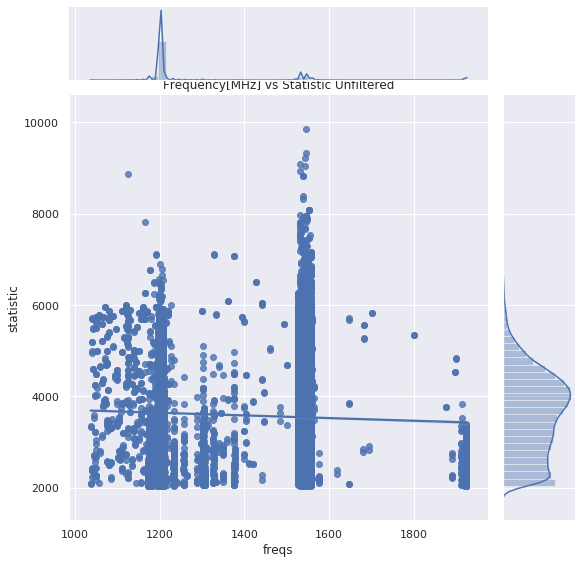

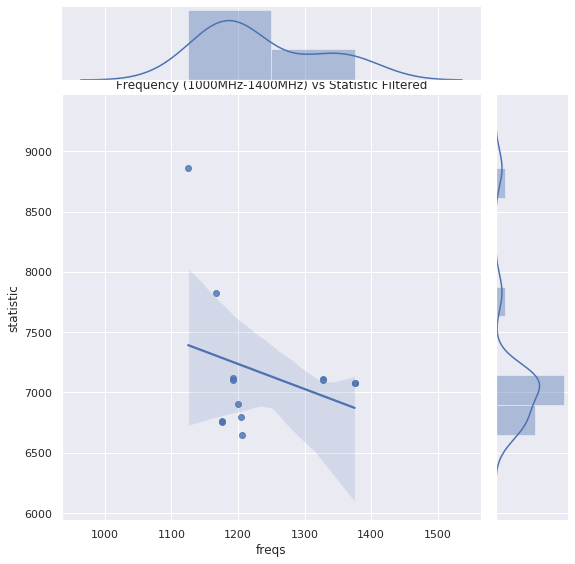

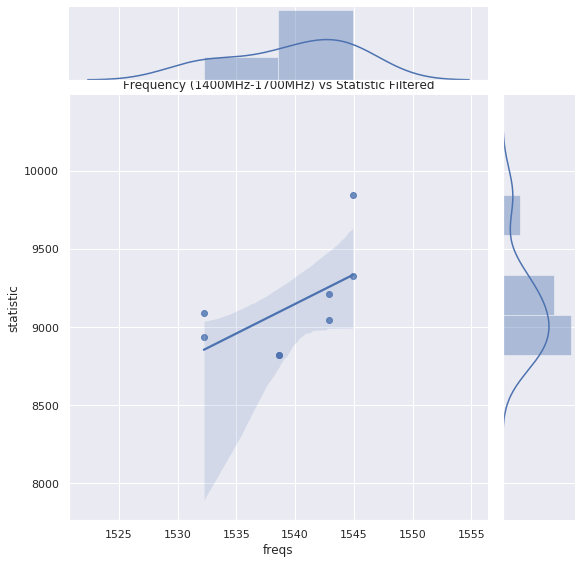

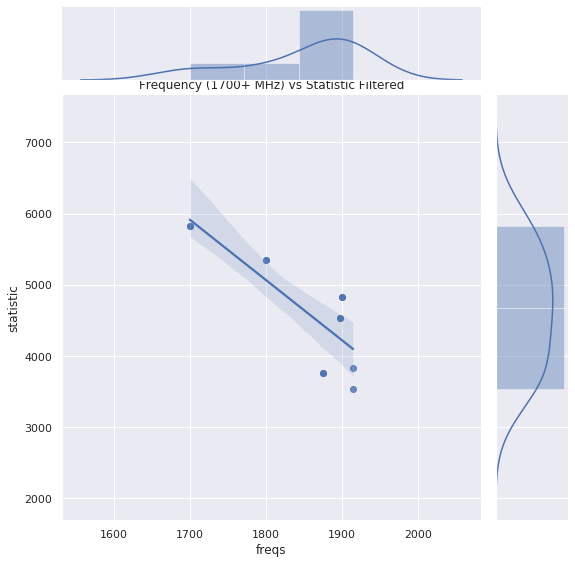

In [147]:
sns.jointplot(x="freqs",y="statistic",data=ob1, height=8, kind="reg")
plt.title("Frequency[MHz] vs Statistic Unfiltered")
sns.jointplot(x="freqs", y="statistic", data=extr_1000_1400_1, height=8, kind="reg")
plt.title("Frequency (1000MHz-1400MHz) vs Statistic Filtered")
sns.jointplot(x="freqs", y="statistic", data=extr_1400_1700_1, height=8, kind="reg")
plt.title("Frequency (1400MHz-1700MHz) vs Statistic Filtered")
sns.jointplot(x="freqs", y="statistic", data=extr_1700_1, height=8, kind="reg")
plt.title("Frequency (1700+ MHz) vs Statistic Filtered")

# Observation 2 #

In [16]:
ob2 = pd.read_pickle("GBT_58014_69579_HIP77629_fine_info_df.pkl")
ob2

,index,statistic,pvalue,block_num,freqs
0,293763780,4597.449118,0.0,10,1105.503011
1,293763880,4620.951901,0.0,10,1105.502732
2,293935080,2058.737294,0.0,10,1105.024405
3,294682256,3228.622372,0.0,10,1102.936819
4,294682356,3231.166332,0.0,10,1102.936540
...,...,...,...,...,...
82132,171955188,4624.005184,0.0,5,1445.832286
82133,173003664,4083.199935,0.0,5,1442.902878
82134,173003764,4101.816018,0.0,5,1442.902599
82135,174943516,3957.444835,0.0,5,1437.482994


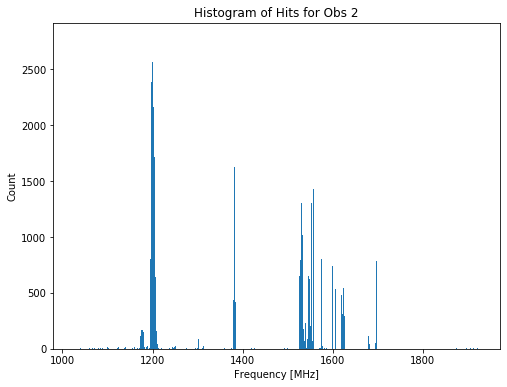

In [17]:
plt.figure(figsize=(8,6))
plt.hist(ob2["freqs"], bins = np.arange(min(ob2["freqs"]),max(ob2["freqs"]), 0.8116025973))

plt.title("Histogram of Hits for Obs 2")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Count")

import base64
import io 
pic_IObytes = io.BytesIO()
plt.savefig(pic_IObytes,  format='png')
pic_IObytes.seek(0)
pic_hash = base64.b64encode(pic_IObytes.read())

In [18]:
pic_hash

b'iVBORw0KGgoAAAANSUhEUgAAAkAAAAGwCAYAAABB4NqyAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nO3dfVRVdaL/8c8R0jREJYUOggLBqKFoCIpZVirSWFKW+ZClDpldq3Em02KmWz5MPszYg6XmihlKbBopu1e5WT6U5UxTGlJ6W2nlycQUuSqCCqUI+v394Wr/QsDQ8Bzw+36t5Vqy2Xuf7/52kjd773OOyxhjBAAAYJEmvh4AAACAtxFAAADAOgQQAACwDgEEAACsQwABAADrEEAAAMA6BBAAALAOAQQAAKxDAAEAAOsQQAAAwDoEEAAAsA4BBAAArEMAAQAA6xBAAADAOgQQAACwDgEEAACsQwABAADrEEAAAMA6BBAAALAOAQQAAKxDAAEAAOsQQAAAwDoEEAAAsA4BBAAArEMAAQAA6xBAAADAOgQQAACwDgEEAACsQwABAADrEEAAAMA6BBAAALAOAQQAAKxDAAEAAOsQQAAAwDoEEAAAsA4BBPhIbGysNmzY4Oth+NSKFSsUHh6ugIAAbdmy5bz2ERAQoG+//fYXj+XYsWMaMmSIWrVqpTvvvPMX76+uIiIi9N5773nt8QCcRgABF0BNP9SWLFmia6+91vl627ZtuuGGG866n/z8fLlcLlVWVl6IYfrclClTtHDhQpWVlenqq6+u9n2Xy6VvvvmmyrLp06fr7rvvdr4uKytTVFSUJGncuHH6z//8z/May5tvvqn9+/fr0KFDWr58+Xnt40yHDx/WxIkTdcUVV6hFixbq1q2bXnnllXrZ908dOHBAo0aNUmhoqFq1aqW+ffvqk08+qffHAS4mBBBgMV+H1e7duxUbG+vTMfxo9+7d+tWvfiV/f/9z3r

In [19]:
#Filter to freq range between 1000 and 1400
freq_1000_1400_2 = ob2[(ob2["freqs"] > 1000) & (ob2["freqs"] <= 1400)]

#Find the mean statistic within this range
mean_stat_1000_1400_2 = np.mean(freq_1000_1400_2["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1000_1400_2 = np.std(freq_1000_1400_2["statistic"])

#The most extreme samples, greater than 6 standard deviations from mean statistic
extr_1000_1400_2 = freq_1000_1400_2[freq_1000_1400_2["statistic"] >= 7.5*std_stat_1000_1400_2]
extr_1000_1400_2

,index,statistic,pvalue,block_num,freqs
36926,195016860,9248.795028,0.0,6,1381.398719
37388,195067536,9208.279334,0.0,6,1381.257132
37918,195121936,9326.151092,0.0,6,1381.105140
38010,195131336,9126.633013,0.0,6,1381.078877
38074,195137836,9102.265577,0.0,6,1381.060716
38142,195144636,9109.361045,0.0,6,1381.041717
38362,195167036,9500.617622,0.0,6,1380.979132
38410,195171836,8968.951567,0.0,6,1380.965721
38723,195203636,8925.924467,0.0,6,1380.876873
38963,195228236,9087.307605,0.0,6,1380.808141


In [20]:
samples_url_1000_1400_2 = get_img_url(extr_1000_1400_2, "GBT_58014_69579_HIP77629_fine")
samples_url_1000_1400_2

['https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/6/195016860.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/6/195067536.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/6/195121936.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/6/195131336.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/6/195137836.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/6/195144636.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/6/195167036.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/6/195171836.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/6/195203636.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/6/195228

In [21]:
#Filter to freq range between 1400 and 1700
freq_1400_1700_2 = ob2[(ob2["freqs"] > 1400) & (ob2["freqs"] <= 1700)]

#Find the mean statistic within this range
mean_stat_1400_1700_2 = np.mean(freq_1400_1700_2["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1400_1700_2 = np.std(freq_1400_1700_2["statistic"])

#The most extreme samples, greater than 6 standard deviations from mean statistic
extr_1400_1700_2 = freq_1400_1700_2[freq_1400_1700_2["statistic"] >= 6.5*std_stat_1400_1700_2]
extr_1400_1700_2

,index,statistic,pvalue,block_num,freqs
17810,136493080,10177.636269,0.0,4,1544.912271
17811,136493180,10175.444669,0.0,4,1544.911992
17828,136499780,9553.794361,0.0,4,1544.893552
19184,137379356,9627.665319,0.0,4,1542.436045
19185,137379456,9676.898155,0.0,4,1542.435765
19213,137382256,9563.266458,0.0,4,1542.427942
24514,141019284,9633.539496,0.0,4,1532.266203


In [22]:
samples_url_1400_1700_2 = get_img_url(extr_1400_1700_2, "GBT_58014_69579_HIP77629_fine")
samples_url_1400_1700_2

['https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/4/136493080.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/4/136493180.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/4/136499780.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/4/137379356.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/4/137379456.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/4/137382256.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/4/141019284.png']

In [23]:
#Filter to freq range greater than 1700
freq_1700_2 = ob2[ob2["freqs"] > 1700]

#Find the mean statistic within this range
mean_stat_1700_2 = np.mean(freq_1700_2["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1700_2 = np.std(freq_1700_2["statistic"])

#The most extreme samples, greater than 6 standard deviations from mean statistic
extr_1700_2 = freq_1700_2[freq_1700_2["statistic"] >= 7*std_stat_1700_2]
extr_1700_2

,index,statistic,pvalue,block_num,freqs
51076,80767752,8135.020267,0.0,2,1700.607039
51120,80791752,7837.083588,0.0,2,1700.539984
51136,80794652,7026.268965,0.0,2,1700.531881
51153,80809452,6915.857843,0.0,2,1700.490531
51161,80812152,6747.164495,0.0,2,1700.482987


In [24]:
samples_url_1700_2 = get_img_url(extr_1700_2, "GBT_58014_69579_HIP77629_fine")
samples_url_1700_2

['https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/2/80767752.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/2/80791752.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/2/80794652.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/2/80809452.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/2/80812152.png']

In [25]:
samples_url_2 = samples_url_1000_1400_2+samples_url_1400_1700_2+samples_url_1700_2
samples_url_2

['https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/6/195016860.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/6/195067536.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/6/195121936.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/6/195131336.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/6/195137836.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/6/195144636.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/6/195167036.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/6/195171836.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/6/195203636.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58014_69579_HIP77629_fine/filtered/6/195228

Text(0.5, 1, 'Frequency (1700+ MHz) vs Statistic Filtered')

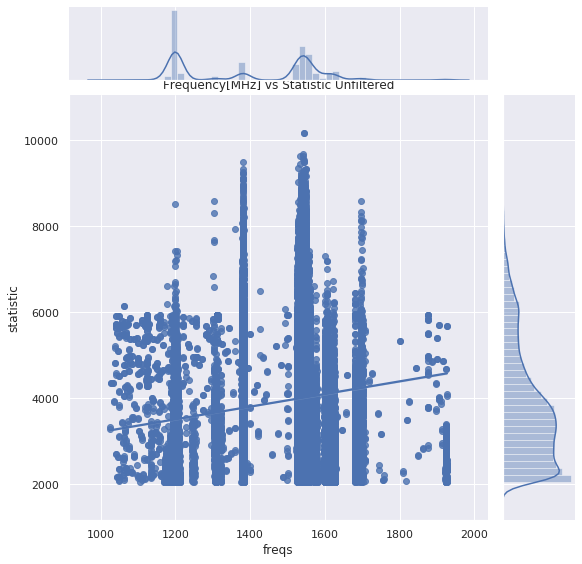

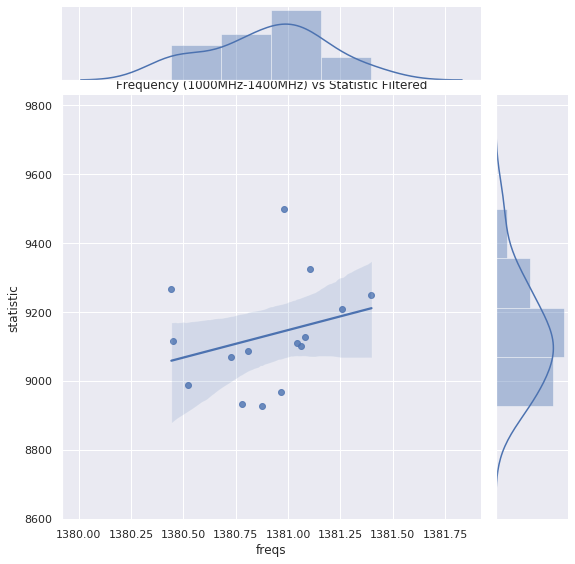

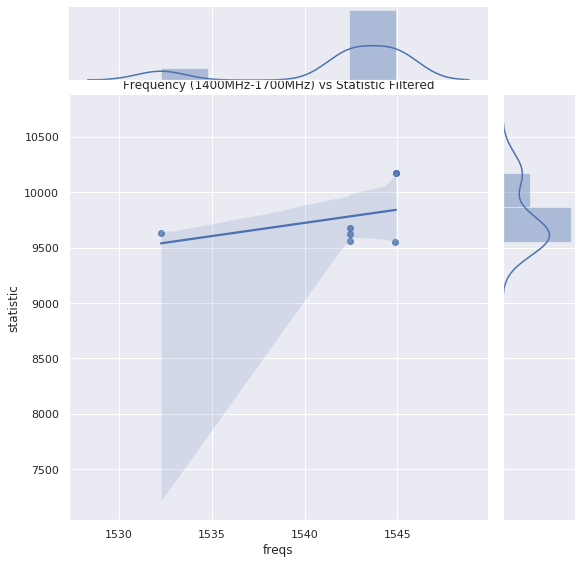

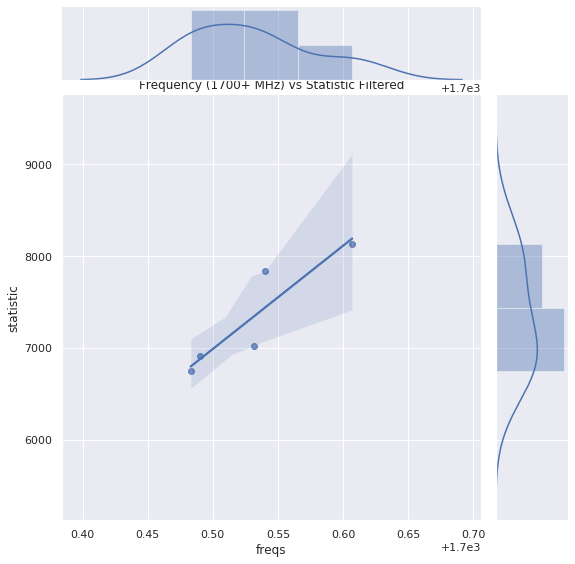

In [149]:
sns.jointplot(x="freqs",y="statistic",data=ob2, height=8, kind="reg")
plt.title("Frequency[MHz] vs Statistic Unfiltered")
sns.jointplot(x="freqs", y="statistic", data=extr_1000_1400_2, height=8, kind="reg")
plt.title("Frequency (1000MHz-1400MHz) vs Statistic Filtered")
sns.jointplot(x="freqs", y="statistic", data=extr_1400_1700_2, height=8, kind="reg")
plt.title("Frequency (1400MHz-1700MHz) vs Statistic Filtered")
sns.jointplot(x="freqs", y="statistic", data=extr_1700_2, height=8, kind="reg")
plt.title("Frequency (1700+ MHz) vs Statistic Filtered")

# Observation 3 #

In [26]:
ob3 = pd.read_pickle("GBT_58110_60123_HIP91926_fine_info_df.pkl")
ob3

,index,statistic,pvalue,block_num,freqs
0,293603280,2075.627695,0.0,10,1105.951443
1,293603380,2101.711596,0.0,10,1105.951164
2,293763180,4185.515088,0.0,10,1105.504688
3,293763280,4195.952572,0.0,10,1105.504408
4,293763780,5300.590344,0.0,10,1105.503011
...,...,...,...,...,...
49793,170470112,5505.122264,0.0,5,1449.981540
49794,173345540,3958.168172,0.0,5,1441.947687
49795,173345640,3947.186923,0.0,5,1441.947408
49796,173345740,3883.331568,0.0,5,1441.947129


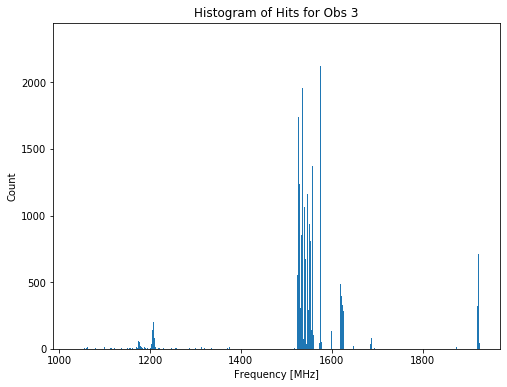

In [27]:
plt.figure(figsize=(8,6))
plt.hist(ob3["freqs"], bins = np.arange(min(ob3["freqs"]),max(ob3["freqs"]), 0.8116025973))

plt.title("Histogram of Hits for Obs 3")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Count")

import base64
import io 
pic_IObytes = io.BytesIO()
plt.savefig(pic_IObytes,  format='png')
pic_IObytes.seek(0)
pic_hash = base64.b64encode(pic_IObytes.read())

In [28]:
pic_hash

b'iVBORw0KGgoAAAANSUhEUgAAAkAAAAGwCAYAAABB4NqyAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nO3de1hVdaL/8c9W1DREIwFBEEQYNRQNxUtOWipSNlo2XrPUMceOTeOZGi3PdMrLZDJjpY2Zz3CGFKujpucokylallNTGjLq6Ulz3F7wghwURQVTBPz+/vC0fhJgpLA3+H2/nscnWHvttb7r2xberrVgu4wxRgAAABap5+0BAAAAeBoBBAAArEMAAQAA6xBAAADAOgQQAACwDgEEAACsQwABAADrEEAAAMA6BBAAALAOAQQAAKxDAAEAAOsQQAAAwDoEEAAAsA4BBAAArEMAAQAA6xBAAADAOgQQAACwDgEEAACsQwABAADrEEAAAMA6BBAAALAOAQQAAKxDAAEAAOsQQAAAwDoEEAAAsA4BBAAArEMAAQAA6xBAAADAOgQQAACwDgEEAACsQwABAADrEEAAAMA6BBAAALAOAQQAAKxDAAEAAOsQQICXxMTEaMuWLd4ehletWbNGYWFh8vX11c6dO69rG76+vjp48OANj+XChQsaPHiwmjVrpuHDh9/w9qoqIiJCH330kcf2B+AKAgioARV9U1u6dKl++tOfOp/v3r1b99xzzzW3k5WVJZfLpZKSkpoYptdNnTpVb7zxhgoLC3XnnXeWe9zlcmn//v1lls2cOVOPPvqo83lhYaEiIyMlSePHj9e///u/X9dYVq9erdzcXJ06dUqrVq26rm1835kzZzR58mS1bNlSTZo0UadOnbRkyZJq2fb33XvvvQoICJCfn586d+6stLS0GtkPcLPw8fYAAHhPSUmJfHy892Xg8OHDiomJ8dr+r3b48GH95Cc/ua75qG

In [29]:
#Filter to freq range between 1000 and 1400
freq_1000_1400_3 = ob3[(ob3["freqs"] > 1000) & (ob3["freqs"] <= 1400)]

#Find the mean statistic within this range
mean_stat_1000_1400_3 = np.mean(freq_1000_1400_3["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1000_1400_3 = np.std(freq_1000_1400_3["statistic"])

#The most extreme samples, greater than 6 standard deviations from mean statistic
extr_1000_1400_3 = freq_1000_1400_3[freq_1000_1400_3["statistic"] >= 6.5*std_stat_1000_1400_3]
extr_1000_1400_3

,index,statistic,pvalue,block_num,freqs
125,307563268,7178.136447,0.0,10,1066.947687
126,307563368,7161.340916,0.0,10,1066.947408
1369,234285748,7037.244285,0.0,7,1271.682713
46877,268370080,7079.065415,0.0,9,1176.452190
46878,268370180,7323.653633,0.0,9,1176.451910
48128,238642352,7139.274281,0.0,8,1259.510502
48129,238642452,7136.423186,0.0,8,1259.510223
48154,240454404,7349.293236,0.0,8,1254.447687
48155,240454504,7347.888366,0.0,8,1254.447408
48156,240454604,7230.549663,0.0,8,1254.447129


In [30]:
samples_url_1000_1400_3 = get_img_url(extr_1000_1400_3, "GBT_58110_60123_HIP91926_fine" )
samples_url_1000_1400_3

['https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/10/307563268.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/10/307563368.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/7/234285748.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/9/268370080.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/9/268370180.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/8/238642352.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/8/238642452.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/8/240454404.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/8/240454504.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/8/2404

In [31]:
#Filter to freq range between 1400 and 1700
freq_1400_1700_3 = ob3[(ob3["freqs"] > 1400) & (ob3["freqs"] <= 1700)]

#Find the mean statistic within this range
mean_stat_1400_1700_3 = np.mean(freq_1400_1700_3["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1400_1700_3 = np.std(freq_1400_1700_3["statistic"])

#The most extreme samples, greater than 6 standard deviations from mean statistic
extr_1400_1700_3 = freq_1400_1700_3[freq_1400_1700_3["statistic"] >= 6.5*std_stat_1400_1700_3]
extr_1400_1700_3

,index,statistic,pvalue,block_num,freqs
20848,135761404,9911.131488,0.0,4,1546.956550
20849,135761504,10030.426027,0.0,4,1546.956271
20857,135762304,9430.547582,0.0,4,1546.954036
20885,135765104,9546.652691,0.0,4,1546.946213
20887,135765304,9321.999683,0.0,4,1546.945654
20896,135766204,9444.407039,0.0,4,1546.943139
20932,135769804,9492.535267,0.0,4,1546.933081
20954,135772004,9451.308665,0.0,4,1546.926934
20997,135776304,10128.893105,0.0,4,1546.914920
20998,135776404,9433.261634,0.0,4,1546.914641


In [32]:
samples_url_1400_1700_3 = get_img_url(extr_1000_1400_3, "GBT_58110_60123_HIP91926_fine" )
samples_url_1400_1700_3

['https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/10/307563268.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/10/307563368.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/7/234285748.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/9/268370080.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/9/268370180.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/8/238642352.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/8/238642452.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/8/240454404.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/8/240454504.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/8/2404

In [33]:
#Filter to freq range greater than 1700
freq_1700_3 = ob3[ob3["freqs"] > 1700]

#Find the mean statistic within this range
mean_stat_1700_3 = np.mean(freq_1700_3["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1700_3 = np.std(freq_1700_3["statistic"])

#The most extreme samples, greater than 6 standard deviations from mean statistic
extr_1700_3 = freq_1700_3[freq_1700_3["statistic"] >= 8*std_stat_1700_3]
extr_1700_3

,index,statistic,pvalue,block_num,freqs
1534,96300,5841.544686,0.0,0,1926.000472
1535,96400,5843.562377,0.0,0,1926.000193
1536,375500,5265.877305,0.0,0,1925.220396
1537,375600,5254.893988,0.0,0,1925.220117
1538,381900,6879.458092,0.0,0,1925.202515
1539,382000,6874.267070,0.0,0,1925.202236
3804,7164056,4812.190775,0.0,0,1906.253390
3805,7164156,4796.351528,0.0,0,1906.253111
3814,18317192,5964.818979,0.0,0,1875.091888
3815,18317292,5964.093193,0.0,0,1875.091609


In [34]:
samples_url_1700_3 = get_img_url(extr_1700_3, "GBT_58110_60123_HIP91926_fine")
samples_url_1700_3

['https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/0/96300.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/0/96400.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/0/375500.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/0/375600.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/0/381900.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/0/382000.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/0/7164056.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/0/7164156.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/0/18317192.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/0/18317292.png',
 'https://storag

In [35]:
sample_urls_3 = samples_url_1000_1400_3+samples_url_1400_1700_3+samples_url_1700_3
sample_urls_3

['https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/10/307563268.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/10/307563368.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/7/234285748.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/9/268370080.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/9/268370180.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/8/238642352.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/8/238642452.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/8/240454404.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/8/240454504.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58110_60123_HIP91926_fine/filtered/8/2404

Text(0.5, 1, 'Frequency (1700+ MHz) vs Statistic Filtered')

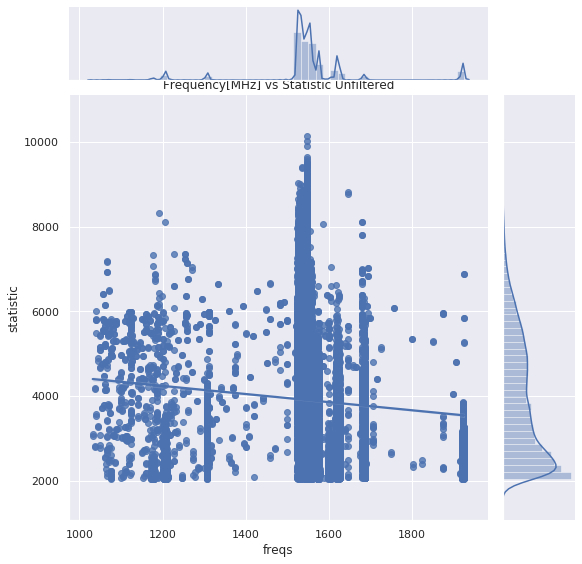

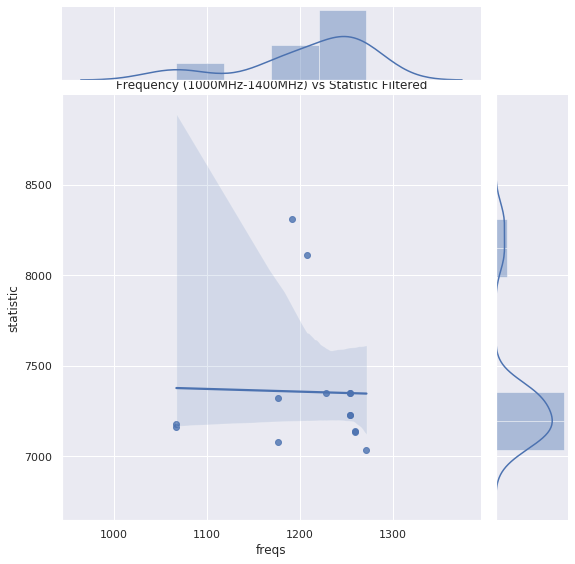

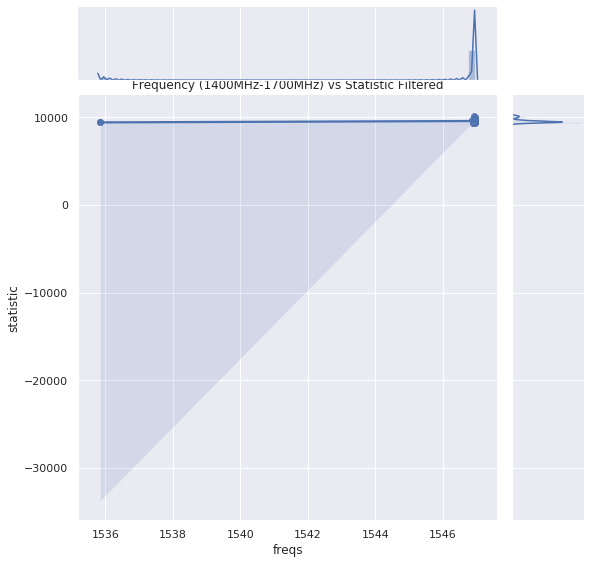

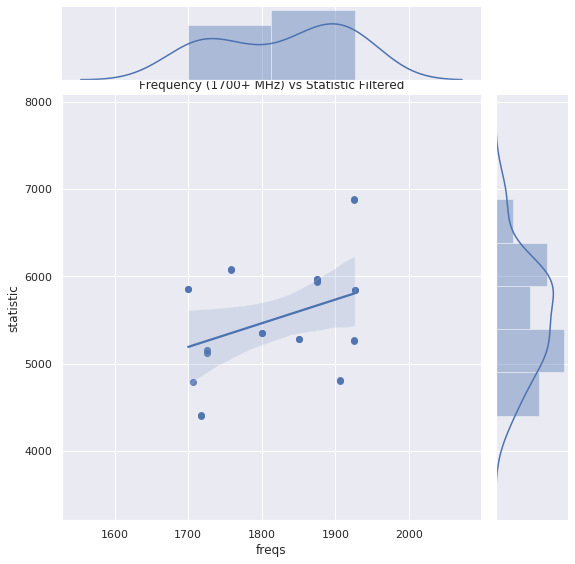

In [150]:
sns.jointplot(x="freqs",y="statistic",data=ob3, height=8, kind="reg")
plt.title("Frequency[MHz] vs Statistic Unfiltered")
sns.jointplot(x="freqs", y="statistic", data=extr_1000_1400_3, height=8, kind="reg")
plt.title("Frequency (1000MHz-1400MHz) vs Statistic Filtered")
sns.jointplot(x="freqs", y="statistic", data=extr_1400_1700_3, height=8, kind="reg")
plt.title("Frequency (1400MHz-1700MHz) vs Statistic Filtered")
sns.jointplot(x="freqs", y="statistic", data=extr_1700_3, height=8, kind="reg")
plt.title("Frequency (1700+ MHz) vs Statistic Filtered")

# Observation 4 #

In [36]:
ob4 = pd.read_pickle("GBT_58202_60970_B0329+54_fine_info_df.pkl")
ob4

,index,statistic,pvalue,block_num,freqs
0,293763180,5565.671052,0.0,10,1105.504688
1,293763280,5557.149917,0.0,10,1105.504408
2,293763780,5845.971862,0.0,10,1105.503011
3,293763880,5845.869528,0.0,10,1105.502732
4,294651656,2560.584748,0.0,10,1103.022315
...,...,...,...,...,...
48467,174029840,3808.115179,0.0,5,1440.035775
48468,174943516,2562.958396,0.0,5,1437.482994
48469,174943616,2607.375500,0.0,5,1437.482715
48470,175651892,4186.151814,0.0,5,1435.503814


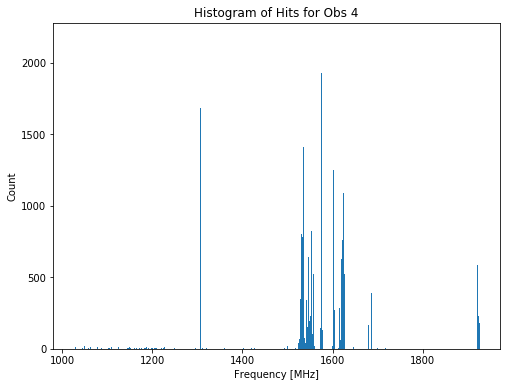

In [37]:
plt.figure(figsize=(8,6))
plt.hist(ob4["freqs"], bins = np.arange(min(ob4["freqs"]),max(ob4["freqs"]), 0.8116025973))

plt.title("Histogram of Hits for Obs 4")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Count")

pic_IObytes = io.BytesIO()
plt.savefig(pic_IObytes,  format='png')
pic_IObytes.seek(0)
pic_hash = base64.b64encode(pic_IObytes.read())

In [38]:
pic_hash

b'iVBORw0KGgoAAAANSUhEUgAAAkAAAAGwCAYAAABB4NqyAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nO3df1RVZaL/8c8R0lREIwVBkB/CiKFoKP7ISRsVaZyRsvFnljpmdm3KmRot73jLH2U6Y6UzZq7hDik2XTW9V7maomXZNKWDjHpbaY7HH5giF0VRwRQBn+8f3vY3BBxSPAd63q+1XEse9jn72U+neLf3PhyXMcYIAADAIg28PQEAAABPI4AAAIB1CCAAAGAdAggAAFiHAAIAANYhgAAAgHUIIAAAYB0CCAAAWIcAAgAA1iGAAACAdQggAABgHQIIAABYhwACAADWIYAAAIB1CCAAAGAdAggAAFiHAAIAANYhgAAAgHUIIAAAYB0CCAAAWIcAAgAA1iGAAACAdQggAABgHQIIAABYhwACAADWIYAAAIB1CCAAAGAdAggAAFiHAAIAANYhgAAAgHUIIAAAYB0CCAAAWIcAAgAA1iGAAACAdQggAABgHQII8JK4uDht27bN29PwqrVr1yosLEx+fn7avXv3DT2Hn5+fDh8+fNNzuXjxogYPHqzmzZtr2LBhN/18NRUREaEPPvjAY/sDcBUBBNwCVf1QW7ZsmX74wx86X+/du1f33XffdZ8nJydHLpdLZWVlt2KaXjdlyhS98cYbKi4u1t13313p+y6XSwcPHqwwNnPmTD3yyCPO18XFxYqKipIkjRs3Tv/2b/92Q3NZs2aN8vPzdfr0aa1evfqGnuNaZ8+e1aRJk9S6dWs1adJEnTp10tKlS2vluavz8ccfy+Vy3fA6ALbw9fYEAHhPWVmZfH2995+Bo0ePKi4uzmv7/7ajR4/qBz/4wQ2tR1XrePnyZQ0YME

In [39]:
#Filter to freq range between 1000 and 1400
freq_1000_1400_4 = ob4[(ob4["freqs"] > 1000) & (ob4["freqs"] <= 1400)]

#Find the mean statistic within this range
mean_stat_1000_1400_4 = np.mean(freq_1000_1400_4["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1000_1400_4 = np.std(freq_1000_1400_4["statistic"])

#The most extreme samples, greater than 6 standard deviations from mean statistic
extr_1000_1400_4 = freq_1000_1400_4[freq_1000_1400_4["statistic"] >= 6.5*std_stat_1000_1400_4]
extr_1000_1400_4

,index,statistic,pvalue,block_num,freqs
82,304686840,7987.698290,0.0,10,1074.984334
107,309118144,8081.123699,0.0,10,1062.603414
171,313630524,6981.774999,0.0,10,1049.995970
270,219354484,6467.725193,0.0,7,1313.400183
271,219354584,6467.657847,0.0,7,1313.399903
3311,222038736,6987.190954,0.0,7,1305.900469
3312,222038836,6988.191931,0.0,7,1305.900190
3331,225509840,7091.532649,0.0,7,1296.202317
3332,225509940,7094.332054,0.0,7,1296.202037
47327,272032584,6348.233629,0.0,9,1166.219272


In [40]:
samples_url_1000_1400_4 = get_img_url(extr_1000_1400_4, "GBT_58202_60970_B0329+54_fine")
samples_url_1000_1400_4

['https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/10/304686840.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/10/309118144.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/10/313630524.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/7/219354484.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/7/219354584.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/7/222038736.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/7/222038836.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/7/225509840.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/7/225509940.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/9/272

In [41]:
#Filter to freq range between 1400 and 1700
freq_1400_1700_4 = ob4[(ob4["freqs"] > 1400) & (ob4["freqs"] <= 1700)]

#Find the mean statistic within this range
mean_stat_1400_1700_4 = np.mean(freq_1400_1700_4["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1400_1700_4 = np.std(freq_1400_1700_4["statistic"])

#The most extreme samples, greater than 6 standard deviations from mean statistic
extr_1400_1700_4 = freq_1400_1700_4[freq_1400_1700_4["statistic"] >= 7*std_stat_1400_1700_4]
extr_1400_1700_4

,index,statistic,pvalue,block_num,freqs
22194,135346204,8858.483088,0.0,4,1548.116606
22374,135364204,9407.771888,0.0,4,1548.066314
22375,135364304,9300.318581,0.0,4,1548.066035
24305,135693804,8858.944785,0.0,4,1547.145423
24341,135697404,9304.776734,0.0,4,1547.135364
24532,135716504,9276.202660,0.0,4,1547.081999
24561,135719404,8970.322081,0.0,4,1547.073897
24588,135722104,9621.423163,0.0,4,1547.066353
24589,135722204,9713.965759,0.0,4,1547.066074
24666,135730004,8992.939972,0.0,4,1547.044281


In [42]:
samples_url_1400_1700_4 = get_img_url(extr_1400_1700_4, "GBT_58202_60970_B0329+54_fine")
samples_url_1400_1700_4

['https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/4/135346204.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/4/135364204.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/4/135364304.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/4/135693804.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/4/135697404.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/4/135716504.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/4/135719404.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/4/135722104.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/4/135722204.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/4/135730

In [43]:
#Filter to freq range greater than 1700
freq_1700_4 = ob4[ob4["freqs"] > 1700]

#Find the mean statistic within this range
mean_stat_1700_4 = np.mean(freq_1700_4["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1700_4 = np.std(freq_1700_4["statistic"])

#The most extreme samples, greater than 6 standard deviations from mean statistic
extr_1700_4 = freq_1700_4[freq_1700_4["statistic"] >= 10*std_stat_1700_4]
extr_1700_4

,index,statistic,pvalue,block_num,freqs
3573,96300,5906.973265,0.0,0,1926.000472
3574,96400,5906.994635,0.0,0,1926.000193
7096,9402108,4939.282430,0.0,0,1900.000345
7097,9402208,4939.245801,0.0,0,1900.000066
7098,10450684,4715.665121,0.0,0,1897.070657
7099,10450784,4722.947762,0.0,0,1897.070378
47503,75018296,4371.681424,0.0,2,1716.670834
47504,75018396,4410.732760,0.0,2,1716.670554
47505,80984852,5851.637172,0.0,2,1700.000469
47506,80984952,5851.649093,0.0,2,1700.000189


In [44]:
samples_url_1700_4 = get_img_url(extr_1700_4, "GBT_58202_60970_B0329+54_fine")
samples_url_1700_4

['https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/0/96300.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/0/96400.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/0/9402108.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/0/9402208.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/0/10450684.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/0/10450784.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/2/75018296.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/2/75018396.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/2/80984852.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/2/80984952.png',
 'https:

In [45]:
sample_urls_4 = samples_url_1000_1400_4+ samples_url_1400_1700_4 + samples_url_1700_4
sample_urls_4

['https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/10/304686840.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/10/309118144.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/10/313630524.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/7/219354484.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/7/219354584.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/7/222038736.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/7/222038836.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/7/225509840.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/7/225509940.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58202_60970_B0329+54_fine/filtered/9/272

Text(0.5, 1, 'Frequency (1700+ MHz) vs Statistic Filtered')

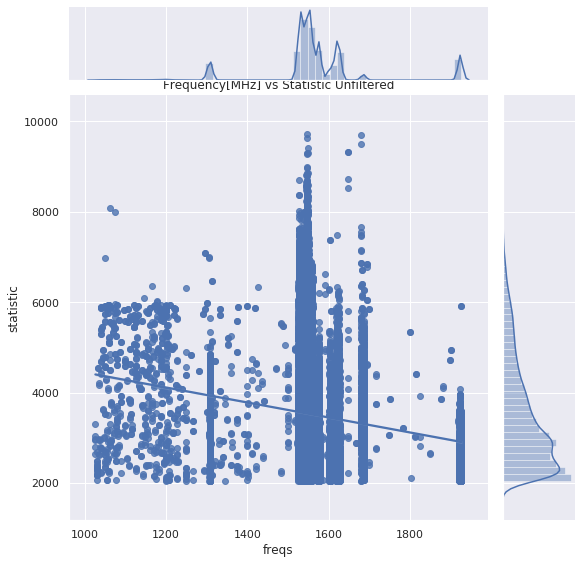

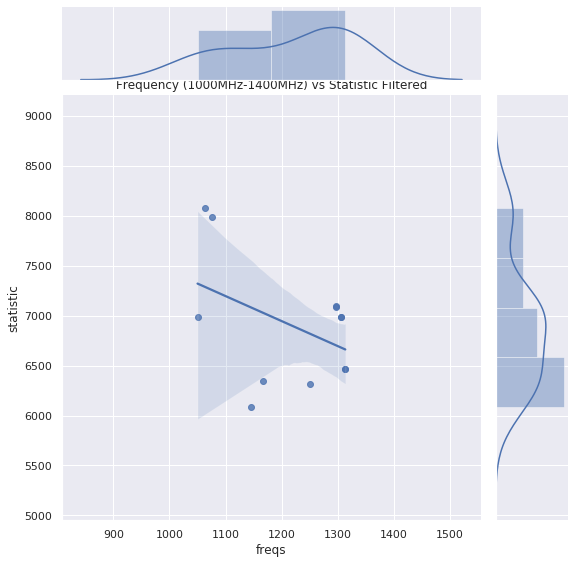

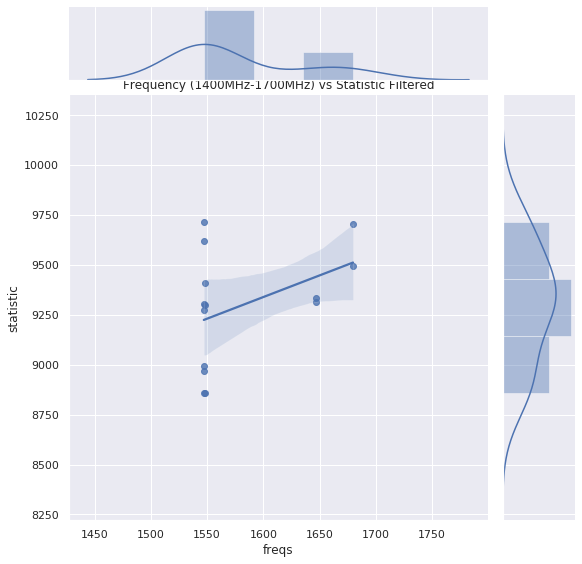

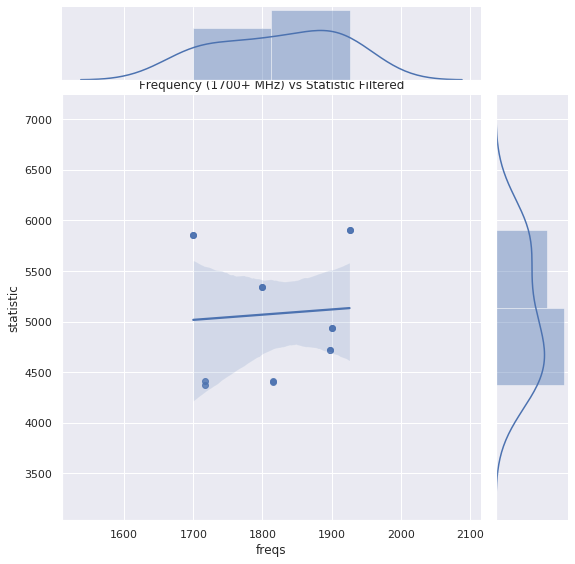

In [151]:
sns.jointplot(x="freqs",y="statistic",data=ob4, height=8, kind="reg")
plt.title("Frequency[MHz] vs Statistic Unfiltered")
sns.jointplot(x="freqs", y="statistic", data=extr_1000_1400_4, height=8, kind="reg")
plt.title("Frequency (1000MHz-1400MHz) vs Statistic Filtered")
sns.jointplot(x="freqs", y="statistic", data=extr_1400_1700_4, height=8, kind="reg")
plt.title("Frequency (1400MHz-1700MHz) vs Statistic Filtered")
sns.jointplot(x="freqs", y="statistic", data=extr_1700_4, height=8, kind="reg")
plt.title("Frequency (1700+ MHz) vs Statistic Filtered")

# Observation 5 #

In [46]:
ob5 = pd.read_pickle("GBT_58210_37805_HIP103730_fine_info_df.pkl")
ob5

,index,statistic,pvalue,block_num,freqs
0,293763780,5308.989340,0.0,10,1105.503011
1,293763880,5309.048066,0.0,10,1105.502732
2,293934980,2137.162501,0.0,10,1105.024684
3,293935080,2156.613780,0.0,10,1105.024405
4,293945180,2131.536180,0.0,10,1104.996186
...,...,...,...,...,...
70379,170470112,5763.922046,0.0,5,1449.981540
70380,173345540,2296.736353,0.0,5,1441.947687
70381,173345640,2296.221680,0.0,5,1441.947408
70382,175651892,3878.790529,0.0,5,1435.503814


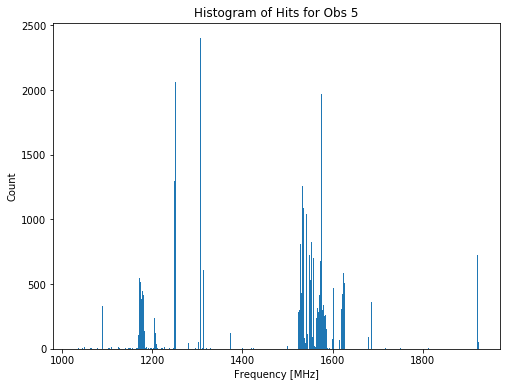

In [47]:
plt.figure(figsize=(8,6))
plt.hist(ob5["freqs"], bins = np.arange(min(ob5["freqs"]),max(ob5["freqs"]), 0.8116025973))

plt.title("Histogram of Hits for Obs 5")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Count")

pic_IObytes = io.BytesIO()
plt.savefig(pic_IObytes,  format='png')
pic_IObytes.seek(0)
pic_hash = base64.b64encode(pic_IObytes.read())

In [48]:
pic_hash

b'iVBORw0KGgoAAAANSUhEUgAAAkAAAAGwCAYAAABB4NqyAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nO3df1iUZaL/8c8IaRqikWLgKD8aUkOREPyRm5WKtO5KWeaPLHWp7Ni2nq203O1U6mayaz9s1briLCW2HSk7RzmVomW525ousunpSmudDEyRo6JoUMov7+8fnp6vBBgpzID3+3VdXZfcPDNzP7eTvHmeZ2ZcxhgjAAAAi7Tx9wQAAAB8jQACAADWIYAAAIB1CCAAAGAdAggAAFiHAAIAANYhgAAAgHUIIAAAYB0CCAAAWIcAAgAA1iGAAACAdQggAABgHQIIAABYhwACAADWIYAAAIB1CCAAAGAdAggAAFiHAAIAANYhgAAAgHUIIAAAYB0CCAAAWIcAAgAA1iGAAACAdQggAABgHQIIAABYhwACAADWIYAAAIB1CCAAAGAdAggAAFiHAAIAANYhgAAAgHUIIAAAYB0CCAAAWIcAAgAA1iGAAACAdQggwE9iY2O1adMmf0/Dr1avXq0ePXooKChI27dvP6f7CAoK0pdffnneczlx4oTGjBmjTp066bbbbjvv+2usyMhIvffeez57PACnEUBAM6jvh9ry5cv1k5/8xPl6586duv766896P4WFhXK5XKqurm6OafrdrFmztHTpUpWXl+vqq6+u832Xy6Uvvvii1tjcuXN1xx13OF+Xl5crOjpakjRt2jT927/92znN5c0339TBgwd15MgRrVq16pzu4/uOHTumGTNm6PLLL1eHDh3Ur18/vfLKK01y398XGRmp9u3bKygoSEFBQRo1alSzPA5woQj09wQA+E91dbUCA/33z8DevXsVGxvrt8c/0969e3XllV

In [49]:
#Filter to freq range between 1000 and 1400
freq_1000_1400_5 = ob5[(ob5["freqs"] > 1000) & (ob5["freqs"] <= 1400)]

#Find the mean statistic within this range
mean_stat_1000_1400_5 = np.mean(freq_1000_1400_5["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1000_1400_5 = np.std(freq_1000_1400_5["statistic"])

#The most extreme samples, greater than 6 standard deviations from mean statistic
extr_1000_1400_5 = freq_1000_1400_5[freq_1000_1400_5["statistic"] >= 10*std_stat_1000_1400_5]
extr_1000_1400_5

,index,statistic,pvalue,block_num,freqs
556,311484172,6816.261690,0.0,10,1055.992808
557,311484272,6814.269635,0.0,10,1055.992529
1202,219354484,6976.826619,0.0,7,1313.400183
1203,219354584,6976.816167,0.0,7,1313.399903
53716,264709652,10559.213578,0.0,9,1186.679307
60872,286786848,7973.197674,0.0,9,1124.996334
69138,242741156,6796.504314,0.0,8,1248.058576
69139,242741256,6778.591780,0.0,8,1248.058297
69173,246402584,6785.293486,0.0,8,1237.828664
69174,246402684,6785.069190,0.0,8,1237.828385


In [50]:
samples_url_1000_1400_5 = get_img_url(extr_1000_1400_5, "GBT_58210_37805_HIP103730_fine")
samples_url_1000_1400_5

['https://storage.cloud.google.com/bl-scale/GBT_58210_37805_HIP103730_fine/filtered/10/311484172.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_37805_HIP103730_fine/filtered/10/311484272.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_37805_HIP103730_fine/filtered/7/219354484.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_37805_HIP103730_fine/filtered/7/219354584.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_37805_HIP103730_fine/filtered/9/264709652.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_37805_HIP103730_fine/filtered/9/286786848.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_37805_HIP103730_fine/filtered/8/242741156.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_37805_HIP103730_fine/filtered/8/242741256.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_37805_HIP103730_fine/filtered/8/246402584.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_37805_HIP103730_fine/filte

In [51]:
#Filter to freq range between 1400 and 1700
freq_1400_1700_5 = ob5[(ob5["freqs"] > 1400) & (ob5["freqs"] <= 1700)]

#Find the mean statistic within this range
mean_stat_1400_1700_5 = np.mean(freq_1400_1700_5["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1400_1700_5 = np.std(freq_1400_1700_5["statistic"])

#The most extreme samples, greater than 6 standard deviations from mean statistic
extr_1400_1700_5 = freq_1400_1700_5[freq_1400_1700_5["statistic"] >= 6.7*std_stat_1400_1700_5]
extr_1400_1700_5

,index,statistic,pvalue,block_num,freqs
26194,133600352,9192.466315,0.0,4,1552.994460
26195,133600452,9179.353466,0.0,4,1552.994180
32171,136765780,8656.691937,0.0,4,1544.150356
32172,136765880,8747.481779,0.0,4,1544.150077
32233,136791780,9363.141557,0.0,4,1544.077713
32234,136791880,9382.169808,0.0,4,1544.077434
38686,141474884,8578.582829,0.0,4,1530.993272
40640,141836660,8386.297563,0.0,4,1529.982481
40753,141847960,8510.214742,0.0,4,1529.950909
40777,141850360,8487.729628,0.0,4,1529.944204


In [52]:
#Filter to freq range greater than 1700
freq_1700_5 = ob5[ob5["freqs"] > 1700]

#Find the mean statistic within this range
mean_stat_1700_5 = np.mean(freq_1700_5["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1700_5 = np.std(freq_1700_5["statistic"])

#The most extreme samples, greater than 6 standard deviations from mean statistic
extr_1700_5 = freq_1700_5[freq_1700_5["statistic"] >= 10*std_stat_1700_5]
extr_1700_5

,index,statistic,pvalue,block_num,freqs
5712,96300,5705.073698,0.0,0,1926.000472
5713,96400,5709.950896,0.0,0,1926.000193
7253,9402108,4913.923815,0.0,0,1900.000345
7254,9402208,4912.824304,0.0,0,1900.000066
7257,16199940,4233.912980,0.0,0,1881.007422
7258,16200040,4230.219527,0.0,0,1881.007142
60935,60083632,6693.814172,0.0,2,1758.397803
60936,60083732,5835.152629,0.0,2,1758.397523
60937,60083832,5969.139662,0.0,2,1758.397244
60941,71958268,5069.473047,0.0,2,1725.220453


In [53]:
sample_urls_5 = get_img_url(extr_1000_1400_5, "GBT_58210_37805_HIP103730_fine") + get_img_url(extr_1400_1700_5, "GBT_58210_37805_HIP103730_fine") + get_img_url(extr_1700_5, "GBT_58210_37805_HIP103730_fine")
sample_urls_5

['https://storage.cloud.google.com/bl-scale/GBT_58210_37805_HIP103730_fine/filtered/10/311484172.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_37805_HIP103730_fine/filtered/10/311484272.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_37805_HIP103730_fine/filtered/7/219354484.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_37805_HIP103730_fine/filtered/7/219354584.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_37805_HIP103730_fine/filtered/9/264709652.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_37805_HIP103730_fine/filtered/9/286786848.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_37805_HIP103730_fine/filtered/8/242741156.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_37805_HIP103730_fine/filtered/8/242741256.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_37805_HIP103730_fine/filtered/8/246402584.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_37805_HIP103730_fine/filte

Text(0.5, 1, 'Frequency (1700+ MHz) vs Statistic Filtered')

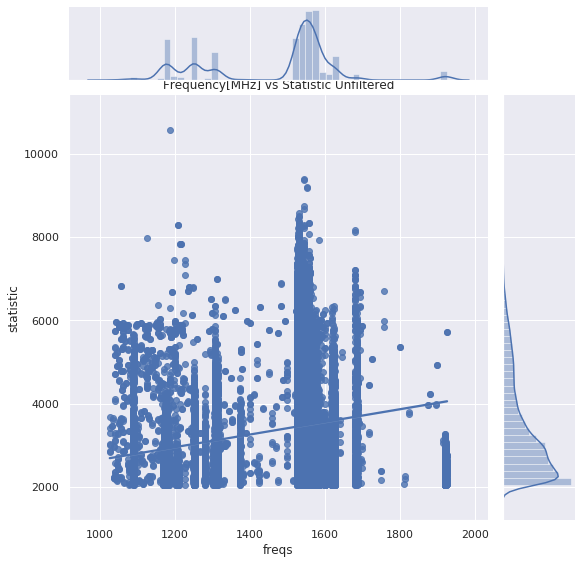

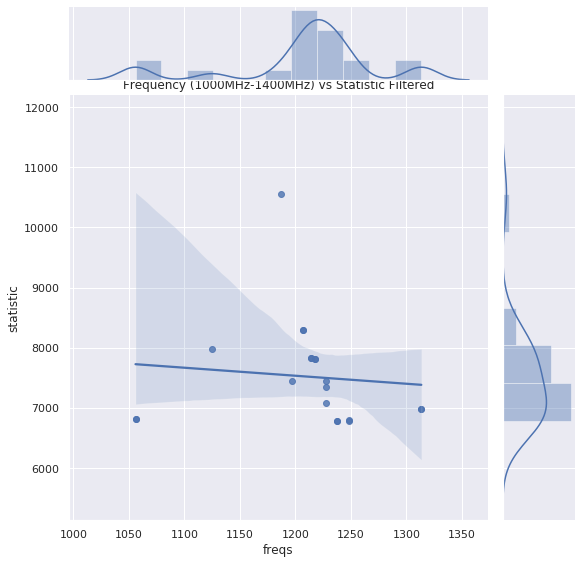

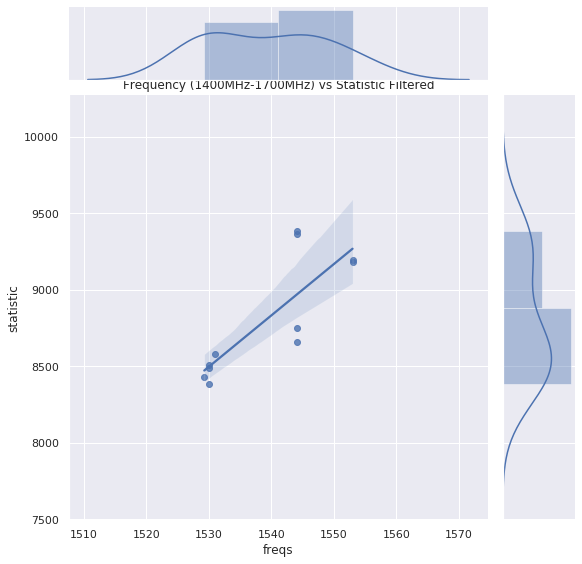

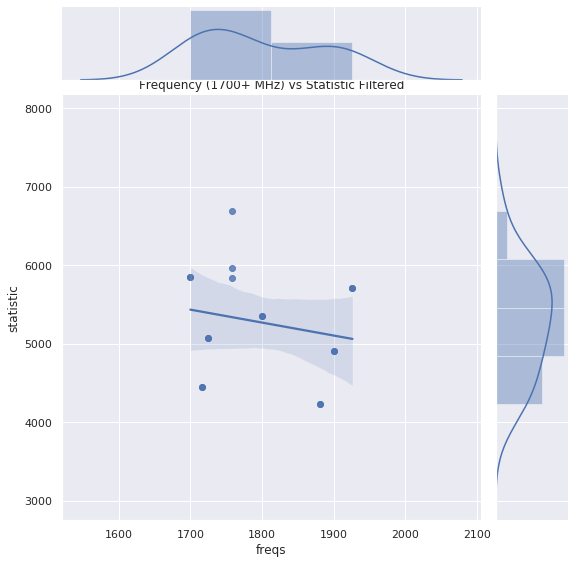

In [152]:
sns.jointplot(x="freqs",y="statistic",data=ob5, height=8, kind="reg")
plt.title("Frequency[MHz] vs Statistic Unfiltered")
sns.jointplot(x="freqs", y="statistic", data=extr_1000_1400_5, height=8, kind="reg")
plt.title("Frequency (1000MHz-1400MHz) vs Statistic Filtered")
sns.jointplot(x="freqs", y="statistic", data=extr_1400_1700_5, height=8, kind="reg")
plt.title("Frequency (1400MHz-1700MHz) vs Statistic Filtered")
sns.jointplot(x="freqs", y="statistic", data=extr_1700_5, height=8, kind="reg")
plt.title("Frequency (1700+ MHz) vs Statistic Filtered")

# Observation 6 #

In [54]:
ob6 = pd.read_pickle("GBT_58210_39862_HIP105504_fine_info_df.pkl")
ob6

,index,statistic,pvalue,block_num,freqs
0,293603180,3628.559005,0.0,10,1105.951723
1,293603280,3663.740572,0.0,10,1105.951443
2,293763780,5426.989901,0.0,10,1105.503011
3,293763880,5426.823940,0.0,10,1105.502732
4,293933880,3260.476168,0.0,10,1105.027758
...,...,...,...,...,...
65330,175061816,3189.444987,0.0,5,1437.152468
65331,175061916,2853.716840,0.0,5,1437.152188
65332,175062016,4267.844207,0.0,5,1437.151909
65333,175651892,2795.599257,0.0,5,1435.503814


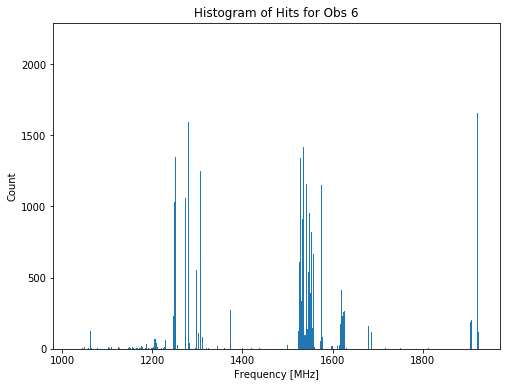

In [55]:
plt.figure(figsize=(8,6))
plt.hist(ob6["freqs"], bins = np.arange(min(ob6["freqs"]),max(ob6["freqs"]), 0.8116025973))

plt.title("Histogram of Hits for Obs 6")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Count")

pic_IObytes = io.BytesIO()
plt.savefig(pic_IObytes,  format='png')
pic_IObytes.seek(0)
pic_hash = base64.b64encode(pic_IObytes.read())

In [56]:
pic_hash

b'iVBORw0KGgoAAAANSUhEUgAAAkAAAAGwCAYAAABB4NqyAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nO3dfXRNd6L/8c+RlIoIUhKJIIlk0BAa4qEGLSIdU1odj9ViUqNXp+NOO7Tu9NbTVJlqSwe1JtOU6PSi3EtuPbdaM52WiQxub6lxPESJXIQgUSKJ7+8Pq/snkmhKck7i+36tZa1kZ5+9v/vrSN723ifHZYwxAgAAsEgtbw8AAADA0wggAABgHQIIAABYhwACAADWIYAAAIB1CCAAAGAdAggAAFiHAAIAANYhgAAAgHUIIAAAYB0CCAAAWIcAAgAA1iGAAACAdQggAABgHQIIAABYhwACAADWIYAAAIB1CCAAAGAdAggAAFiHAAIAANYhgAAAgHUIIAAAYB0CCAAAWIcAAgAA1iGAAACAdQggAABgHQIIAABYhwACAADWIYAAAIB1CCAAAGAdAggAAFiHAAIAANYhgAAAgHUIIAAAYB0CCAAAWIcAArwkJiZG27Zt8/YwvGrNmjVq3ry5/P39tXv37lvahr+/vw4fPnzbY7l06ZIGDhyoBg0aaOjQobe9vYoKDw/Xxx9/7LH9AbiGAAKqQFk/1JYuXaof//jHzud79+7VAw88cNPtZGZmyuVyqaioqCqG6XWTJk3SwoULlZ+fr/vuu6/U110ulw4ePFhi2fTp0/XEE084n+fn5ysyMlKSNHbsWP37v//7LY1l9erVOnnypM6cOaNVq1bd0jZudO7cOU2YMEFNmzaVn5+f2rdvryVLllTKtsvy1ltvKSIiQvXq1VPbtm114MCBKtsXUNP5ensAALynqKhIvr7e+zZw9OhRxcTEeG3/1zt69Kh+9KMf3dJ8lD

In [57]:
#Filter to freq range between 1000 and 1400
freq_1000_1400_6 = ob6[(ob6["freqs"] > 1000) & (ob6["freqs"] <= 1400)]

#Find the mean statistic within this range
mean_stat_1000_1400_6 = np.mean(freq_1000_1400_6["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1000_1400_6 = np.std(freq_1000_1400_6["statistic"])

#The most extreme samples, greater than 6 standard deviations from mean statistic
extr_1000_1400_6 = freq_1000_1400_6[freq_1000_1400_6["statistic"] >= 11.5*std_stat_1000_1400_6]
extr_1000_1400_6

,index,statistic,pvalue,block_num,freqs
3606,222038736,6797.625756,0.0,7,1305.900469
3607,222038836,6796.247438,0.0,7,1305.900190
53032,202579068,8598.805865,0.0,6,1360.270154
53034,202579268,6850.869726,0.0,6,1360.269595
56986,264708352,6750.683810,0.0,9,1186.682940
56988,264708552,10447.669885,0.0,9,1186.682381
57101,272031284,6975.806017,0.0,9,1166.222904
57103,272031484,7385.594886,0.0,9,1166.222345
57290,286795448,6982.759249,0.0,9,1124.972306
57291,286795548,6981.751969,0.0,9,1124.972027


In [58]:
#Filter to freq range between 1400 and 1700
freq_1400_1700_6 = ob6[(ob6["freqs"] > 1400) & (ob6["freqs"] <= 1700)]

#Find the mean statistic within this range
mean_stat_1400_1700_6 = np.mean(freq_1400_1700_6["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1400_1700_6 = np.std(freq_1400_1700_6["statistic"])

#The most extreme samples, greater than 6 standard deviations from mean statistic
extr_1400_1700_6 = freq_1400_1700_6[freq_1400_1700_6["statistic"] >= 6*std_stat_1400_1700_6]
extr_1400_1700_6.head()

,index,statistic,pvalue,block_num,freqs
35421,136640680,8874.182744,0.0,4,1544.499882
35456,136777680,9441.662084,0.0,4,1544.117108
35458,136777880,9025.095808,0.0,4,1544.116549
35472,136787780,10117.883295,0.0,4,1544.088889
35473,136787880,10103.123047,0.0,4,1544.088610


In [59]:
#Filter to freq range greater than 1700
freq_1700_6 = ob6[ob6["freqs"] > 1700]

#Find the mean statistic within this range
mean_stat_1700_6 = np.mean(freq_1700_6["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1700_6 = np.std(freq_1700_6["statistic"])

#The most extreme samples, greater than 6 standard deviations from mean statistic
extr_1700_6 = freq_1700_6[freq_1700_6["statistic"] >= 9.5*std_stat_1700_6]
extr_1700_6

,index,statistic,pvalue,block_num,freqs
15911,96300,5882.763520,0.0,0,1926.000472
15912,96400,5883.759643,0.0,0,1926.000193
19583,7074256,4630.882914,0.0,0,1906.504288
19621,7081356,4534.498893,0.0,0,1906.484451
19752,9402108,4914.197538,0.0,0,1900.000345
19753,9402208,4913.486032,0.0,0,1900.000066
57347,60083632,7232.062229,0.0,2,1758.397803
57348,60083732,7240.723828,0.0,2,1758.397523
57374,80984852,5852.061230,0.0,2,1700.000469
57375,80984952,5852.075019,0.0,2,1700.000189


In [60]:
sample_urls_6 = get_img_url(extr_1000_1400_6, "GBT_58210_39862_HIP105504_fine") + get_img_url(extr_1400_1700_6, "GBT_58210_39862_HIP105504_fine") + get_img_url(extr_1700_6, "GBT_58210_39862_HIP105504_fine")
sample_urls_6

['https://storage.cloud.google.com/bl-scale/GBT_58210_39862_HIP105504_fine/filtered/7/222038736.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_39862_HIP105504_fine/filtered/7/222038836.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_39862_HIP105504_fine/filtered/6/202579068.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_39862_HIP105504_fine/filtered/6/202579268.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_39862_HIP105504_fine/filtered/9/264708352.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_39862_HIP105504_fine/filtered/9/264708552.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_39862_HIP105504_fine/filtered/9/272031284.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_39862_HIP105504_fine/filtered/9/272031484.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_39862_HIP105504_fine/filtered/9/286795448.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_39862_HIP105504_fine/filtere

Text(0.5, 1, 'Frequency (1700+ MHz) vs Statistic Filtered')

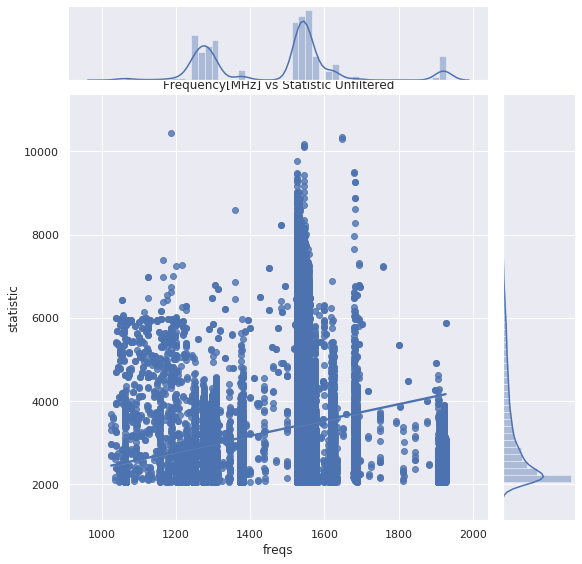

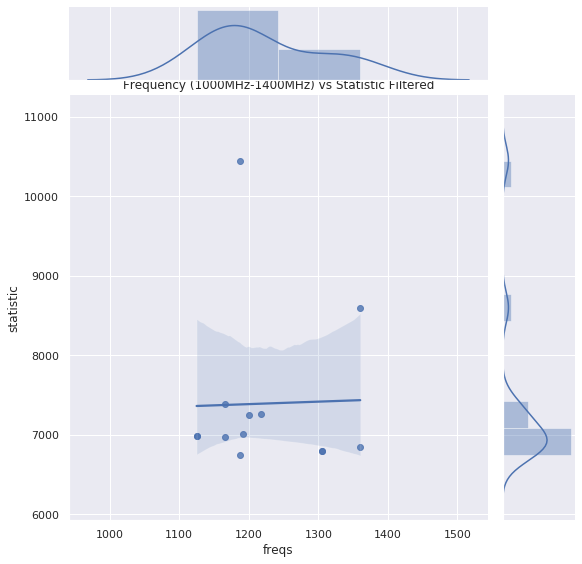

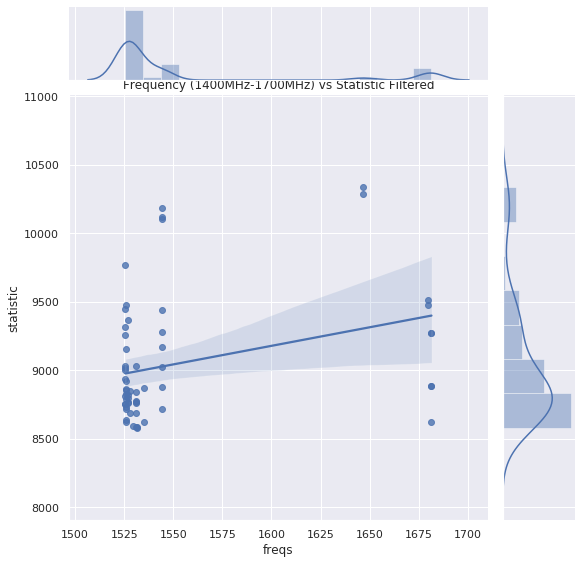

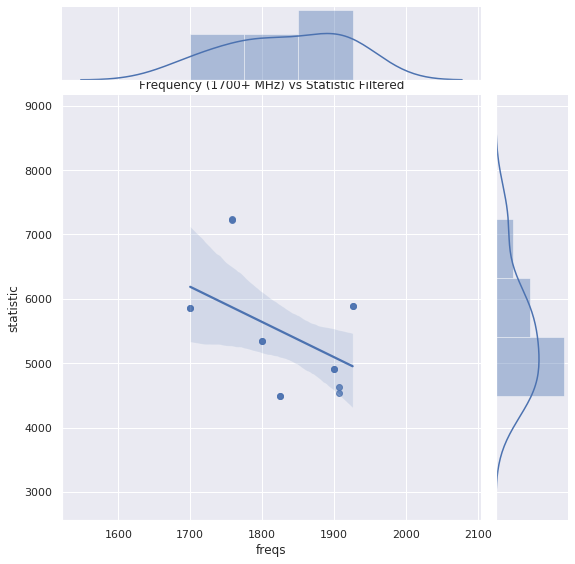

In [153]:
sns.jointplot(x="freqs",y="statistic",data=ob6, height=8, kind="reg")
plt.title("Frequency[MHz] vs Statistic Unfiltered")
sns.jointplot(x="freqs", y="statistic", data=extr_1000_1400_6, height=8, kind="reg")
plt.title("Frequency (1000MHz-1400MHz) vs Statistic Filtered")
sns.jointplot(x="freqs", y="statistic", data=extr_1400_1700_6, height=8, kind="reg")
plt.title("Frequency (1400MHz-1700MHz) vs Statistic Filtered")
sns.jointplot(x="freqs", y="statistic", data=extr_1700_6, height=8, kind="reg")
plt.title("Frequency (1700+ MHz) vs Statistic Filtered")

# Observation 7 #

In [61]:
ob7 = pd.read_pickle("GBT_58210_40853_HIP106147_fine_info_df.pkl")
ob7

,index,statistic,pvalue,block_num,freqs
0,293603180,4119.678502,0.0,10,1105.951723
1,293603280,4082.990226,0.0,10,1105.951443
2,293763780,5350.158386,0.0,10,1105.503011
3,293763880,5352.059460,0.0,10,1105.502732
4,293934980,3193.481099,0.0,10,1105.024684
...,...,...,...,...,...
77093,173345640,2620.809419,0.0,5,1441.947408
77094,173345740,3101.433543,0.0,5,1441.947129
77095,173345840,3144.830389,0.0,5,1441.946849
77096,175651892,2548.274834,0.0,5,1435.503814


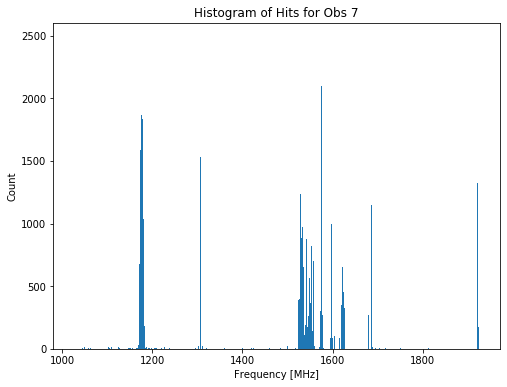

In [62]:
plt.figure(figsize=(8,6))
plt.hist(ob7["freqs"], bins = np.arange(min(ob7["freqs"]),max(ob7["freqs"]), 0.8116025973))

plt.title("Histogram of Hits for Obs 7")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Count")

pic_IObytes = io.BytesIO()
plt.savefig(pic_IObytes,  format='png')
pic_IObytes.seek(0)
pic_hash = base64.b64encode(pic_IObytes.read())

In [63]:
pic_hash

b'iVBORw0KGgoAAAANSUhEUgAAAkAAAAGwCAYAAABB4NqyAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nO3df1iUdaL//9cIaRqikULgoEDDqqFICP6oTUtFWlsp0/yRJS6VHav1bKXl2U6lbia79sPWrCvOkmLbkbJzlFMpWpa7bekim56utNbJoBQ5KIoGpQj4/v7hp/sbAkaKM9D7+bgurwve3DPzvt9N8vS+75lxGWOMAAAALNLO3xMAAADwNQIIAABYhwACAADWIYAAAIB1CCAAAGAdAggAAFiHAAIAANYhgAAAgHUIIAAAYB0CCAAAWIcAAgAA1iGAAACAdQggAABgHQIIAABYhwACAADWIYAAAIB1CCAAAGAdAggAAFiHAAIAANYhgAAAgHUIIAAAYB0CCAAAWIcAAgAA1iGAAACAdQggAABgHQIIAABYhwACAADWIYAAAIB1CCAAAGAdAggAAFiHAAIAANYhgAAAgHUIIAAAYB0CCAAAWIcAAgAA1iGAAD+Ji4vT5s2b/T0Nv1qzZo0iIyMVFBSk7du3n9V9BAUF6YsvvjjnuRw7dkxjx45Vly5ddPPNN5/z/TVXVFSU3nnnHZ89HoBTCCDgPGjsl9qKFSv085//3Pl+586duuaaa854P8XFxXK5XKqtrT0f0/S72bNn67nnnlNVVZWuuOKKBj93uVz6/PPP643NmzdPt956q/N9VVWVYmJiJEnTp0/Xv//7v5/VXF5//XWVlZXp0KFDWr169Vndx+mOHDmimTNn6tJLL1WnTp3Uv39/LV++vEXu+/u++uorBQUF1fvjcrn01FNPtfhjAT8Vgf6eAAD/qa2tVWCg//4a+PLLLxUXF+e3x/++L7/8Uj/72c

In [64]:
#Filter to freq range between 1000 and 1400
freq_1000_1400_7 = ob7[(ob7["freqs"] > 1000) & (ob7["freqs"] <= 1400)]

#Find the mean statistic within this range
mean_stat_1000_1400_7 = np.mean(freq_1000_1400_7["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1000_1400_7 = np.std(freq_1000_1400_7["statistic"])

#The most extreme samples, greater than 7 standard deviations from mean statistic
extr_1000_1400_7 = freq_1000_1400_7[freq_1000_1400_7["statistic"] >= 10.5*std_stat_1000_1400_7]
extr_1000_1400_7

,index,statistic,pvalue,block_num,freqs
270,219354484,7614.620507,0.0,7,1313.400183
271,219354584,7614.578966,0.0,7,1313.399903
3778,222038736,7802.023087,0.0,7,1305.900469
3779,222038836,7801.979675,0.0,7,1305.900190
3902,225509540,7710.417247,0.0,7,1296.203155
3903,225509640,7710.460512,0.0,7,1296.202876
73541,286795448,6756.771172,0.0,9,1124.972306
73542,286795548,6757.887864,0.0,9,1124.972027
76840,246402784,6826.988466,0.0,8,1237.828106
76859,250062488,6942.565519,0.0,8,1227.603011


In [65]:
#Filter to freq range between 1400 and 1700
freq_1400_1700_7 = ob7[(ob7["freqs"] > 1400) & (ob7["freqs"] <= 1700)]

#Find the mean statistic within this range
mean_stat_1400_1700_7 = np.mean(freq_1400_1700_7["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1400_1700_7 = np.std(freq_1400_1700_7["statistic"])

#The most extreme samples, greater than 7 standard deviations from mean statistic
extr_1400_1700_7 = freq_1400_1700_7[freq_1400_1700_7["statistic"] >= 6.5*std_stat_1400_1700_7]
extr_1400_1700_7

,index,statistic,pvalue,block_num,freqs
26489,135614104,9382.536630,0.0,4,1547.368102
26490,135614204,9225.177040,0.0,4,1547.367822
26544,135619604,9837.483942,0.0,4,1547.352735
26545,135619704,9784.984566,0.0,4,1547.352456
26691,135634404,9329.423035,0.0,4,1547.311384
26692,135634504,9307.431104,0.0,4,1547.311105
26963,135662504,9183.552572,0.0,4,1547.232874
27930,136485880,9200.869356,0.0,4,1544.932388
36841,141709660,9168.960523,0.0,4,1530.337315
36848,141710360,9155.495870,0.0,4,1530.335359


In [66]:
#Filter to freq range greater than 1700
freq_1700_7 = ob7[ob7["freqs"] > 1700]

#Find the mean statistic within this range
mean_stat_1700_7 = np.mean(freq_1700_7["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1700_7 = np.std(freq_1700_7["statistic"])

#The most extreme samples, greater than 7 standard deviations from mean statistic
extr_1700_7 = freq_1700_7[freq_1700_7["statistic"] >= 11.5*std_stat_1700_7]
extr_1700_7

,index,statistic,pvalue,block_num,freqs
4179,524100,8628.631692,0.0,0,1924.805213
4180,524200,8629.937785,0.0,0,1924.804933
7734,2621252,8653.129612,0.0,0,1918.945838
7735,2621352,8655.998718,0.0,0,1918.945558
7738,3669828,8613.210440,0.0,0,1916.016150
7739,3669928,8611.955456,0.0,0,1916.015871
7740,4718404,8596.055391,0.0,0,1913.086463
7741,4718504,8596.025108,0.0,0,1913.086183
7742,5766980,8068.958282,0.0,0,1910.156775
7743,5767080,8068.948829,0.0,0,1910.156496


In [67]:
sample_urls_7 = get_img_url(extr_1000_1400_7, "GBT_58210_40853_HIP106147_fine") + get_img_url(extr_1400_1700_7, "GBT_58210_40853_HIP106147_fine") + get_img_url(extr_1700_7,"GBT_58210_40853_HIP106147_fine")
sample_urls_7

['https://storage.cloud.google.com/bl-scale/GBT_58210_40853_HIP106147_fine/filtered/7/219354484.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_40853_HIP106147_fine/filtered/7/219354584.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_40853_HIP106147_fine/filtered/7/222038736.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_40853_HIP106147_fine/filtered/7/222038836.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_40853_HIP106147_fine/filtered/7/225509540.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_40853_HIP106147_fine/filtered/7/225509640.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_40853_HIP106147_fine/filtered/9/286795448.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_40853_HIP106147_fine/filtered/9/286795548.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_40853_HIP106147_fine/filtered/8/246402784.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_40853_HIP106147_fine/filtere

Text(0.5, 1, 'Frequency (1700+ MHz) vs Statistic Filtered')

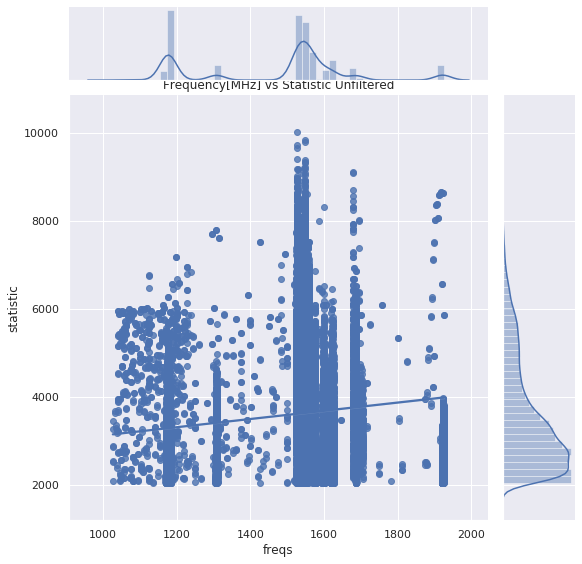

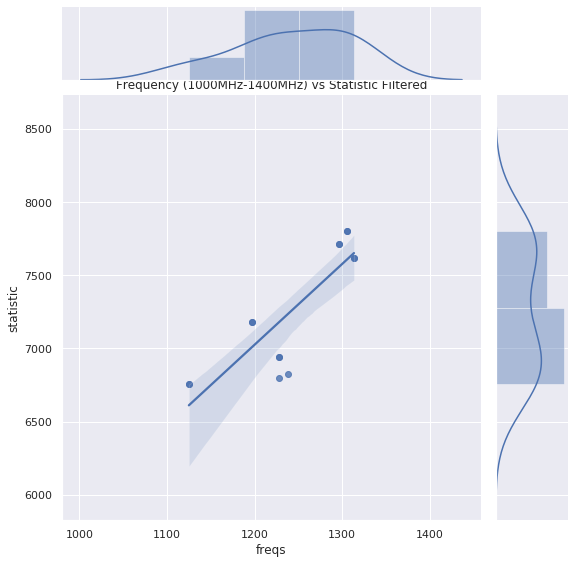

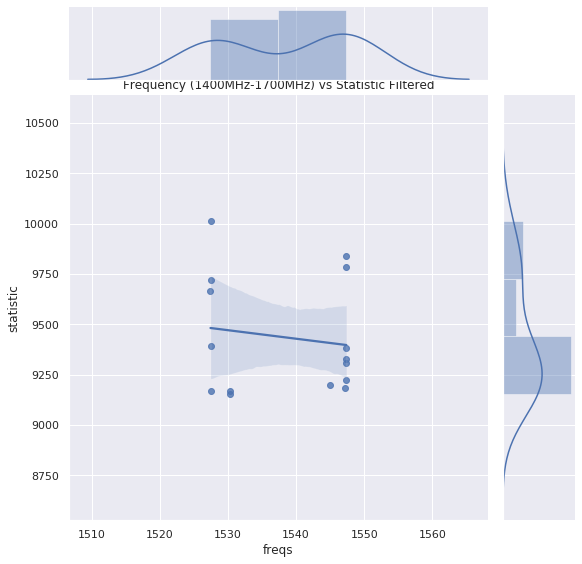

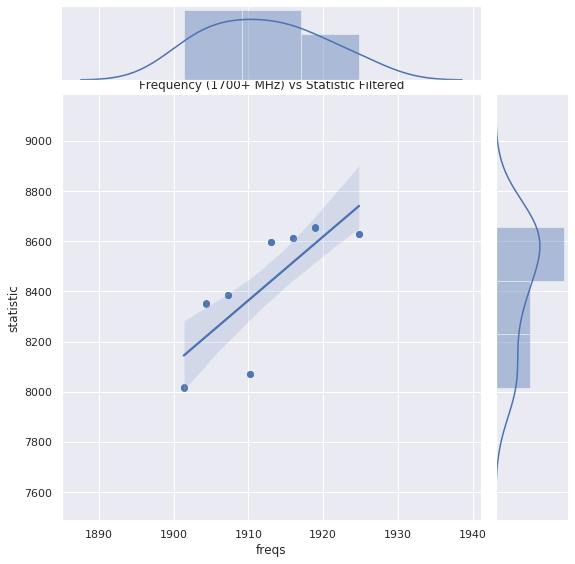

In [154]:
sns.jointplot(x="freqs",y="statistic",data=ob7, height=8, kind="reg")
plt.title("Frequency[MHz] vs Statistic Unfiltered")
sns.jointplot(x="freqs", y="statistic", data=extr_1000_1400_7, height=8, kind="reg")
plt.title("Frequency (1000MHz-1400MHz) vs Statistic Filtered")
sns.jointplot(x="freqs", y="statistic", data=extr_1400_1700_7, height=8, kind="reg")
plt.title("Frequency (1400MHz-1700MHz) vs Statistic Filtered")
sns.jointplot(x="freqs", y="statistic", data=extr_1700_7, height=8, kind="reg")
plt.title("Frequency (1700+ MHz) vs Statistic Filtered")

# Observation 8 #

In [68]:
ob8 = pd.read_pickle("GBT_58210_41185_HIP105761_fine_info_df.pkl")
ob8

,index,statistic,pvalue,block_num,freqs
0,293603180,4446.652890,0.0,10,1105.951723
1,293603280,4395.358225,0.0,10,1105.951443
2,293763780,5526.497124,0.0,10,1105.503011
3,293763880,5525.459132,0.0,10,1105.502732
4,293933880,3468.912391,0.0,10,1105.027758
...,...,...,...,...,...
68425,169751336,2781.008489,0.0,5,1451.989777
68426,170470012,4796.093529,0.0,5,1449.981820
68427,170470112,4836.271047,0.0,5,1449.981540
68428,175651892,3012.218794,0.0,5,1435.503814


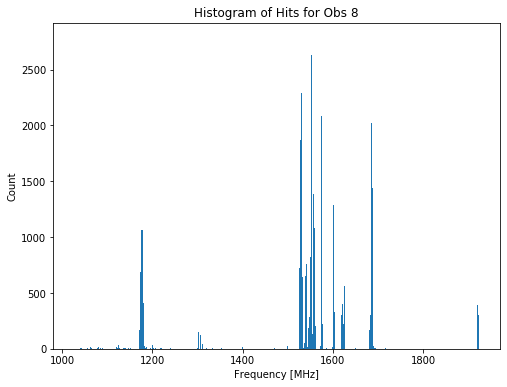

In [69]:
plt.figure(figsize=(8,6))
plt.hist(ob8["freqs"], bins = np.arange(min(ob8["freqs"]),max(ob8["freqs"]), 0.8116025973))

plt.title("Histogram of Hits for Obs 8")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Count")

pic_IObytes = io.BytesIO()
plt.savefig(pic_IObytes,  format='png')
pic_IObytes.seek(0)
pic_hash = base64.b64encode(pic_IObytes.read())

In [70]:
pic_hash

b'iVBORw0KGgoAAAANSUhEUgAAAkAAAAGwCAYAAABB4NqyAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nO3df1RVZaL/8c8R0jREJYXAgwJCYigSgj8qrVSkcZKyzB9Z6pjZtRpnMi1nupU6+WPGSkutFTOU2FSY3VFu5q+ynGlKQya9rTTHk0ohMiqCBqUI+nz/8NteIlBkeA74vF9ruUb22XufZz+dgbd778NxGWOMAAAALNLE1wMAAADwNgIIAABYhwACAADWIYAAAIB1CCAAAGAdAggAAFiHAAIAANYhgAAAgHUIIAAAYB0CCAAAWIcAAgAA1iGAAACAdQggAABgHQIIAABYhwACAADWIYAAAIB1CCAAAGAdAggAAFiHAAIAANYhgAAAgHUIIAAAYB0CCAAAWIcAAgAA1iGAAACAdQggAABgHQIIAABYhwACAADWIYAAAIB1CCAAAGAdAggAAFiHAAIAANYhgAAAgHUIIAAAYB0CCAAAWIcAAgAA1iGAAB+Ji4vTpk2bfD0Mn1q5cqXCw8MVEBCgbdu2ndc+AgICtHfv3p89luPHj2vIkCFq1aqV7rjjjp+9v7qKiIjQe++957XnA3AGAQRcADX9UFu6dKmuu+465+sdO3bohhtu+MH95OXlyeVyqbKy8kIM0+emTp2qxYsXq6ysTFdffXW1x10ul7788ssqy2bMmKG77rrL+bqsrExRUVGSpHHjxum///u/z2ssb731lg4ePKgjR45oxYoV57WPcx09elSTJk3SFVdcoRYtWqhbt2565ZVX6mXf59q+fbv69u2rVq1aye12a9asWRfkeYCLhb+vBwDAdyorK+Xv77tvA1999ZXi4uJ89vxn++qrr3TllVee13

In [71]:
#Filter to freq range between 1000 and 1400
freq_1000_1400_8 = ob8[(ob8["freqs"] > 1000) & (ob8["freqs"] <= 1400)]

#Find the mean statistic within this range
mean_stat_1000_1400_8 = np.mean(freq_1000_1400_8["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1000_1400_8 = np.std(freq_1000_1400_8["statistic"])

#The most extreme samples, greater than 8 standard deviations from mean statistic
extr_1000_1400_8 = freq_1000_1400_8[freq_1000_1400_8["statistic"] >= 9*std_stat_1000_1400_8]
extr_1000_1400_8

,index,statistic,pvalue,block_num,freqs
208,311484172,7095.743831,0.0,10,1055.992808
209,311484272,7095.844035,0.0,10,1055.992529
351,219354484,7132.011160,0.0,7,1313.400183
352,219354584,7131.997433,0.0,7,1313.399903
2718,222038736,6935.597556,0.0,7,1305.900469
2719,222038836,6937.391098,0.0,7,1305.900190
3385,224460964,7052.428025,0.0,7,1299.132843
3386,224461064,7055.257465,0.0,7,1299.132563
3387,225509540,7129.280050,0.0,7,1296.203155
3388,225509640,7129.272002,0.0,7,1296.202876


In [72]:
#Filter to freq range between 1400 and 1700
freq_1400_1700_8 = ob8[(ob8["freqs"] > 1400) & (ob8["freqs"] <= 1700)]

#Find the mean statistic within this range
mean_stat_1400_1700_8 = np.mean(freq_1400_1700_8["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1400_1700_8 = np.std(freq_1400_1700_8["statistic"])

#The most extreme samples, greater than 7 standard deviations from mean statistic
extr_1400_1700_8 = freq_1400_1700_8[freq_1400_1700_8["statistic"] >= 6.5*std_stat_1400_1700_8]
extr_1400_1700_8

,index,statistic,pvalue,block_num,freqs
37359,142923736,9444.355570,0.0,4,1526.945226
37415,142929336,9247.917781,0.0,4,1526.929580
37479,142935736,9299.835234,0.0,4,1526.911698
39234,88140684,9835.265991,0.0,3,1680.007305
39235,88140784,9922.205344,0.0,3,1680.007026
39411,88181484,9500.658285,0.0,3,1679.893311
39412,88181584,9532.900009,0.0,3,1679.893032
39422,88185884,10338.737708,0.0,3,1679.881018
39423,88185984,10362.838376,0.0,3,1679.880738
39429,88188984,9495.565022,0.0,3,1679.872356


In [73]:
#Filter to freq range greater than 1700
freq_1700_8 = ob8[ob8["freqs"] > 1700]

#Find the mean statistic within this range
mean_stat_1700_8 = np.mean(freq_1700_8["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1700_8 = np.std(freq_1700_8["statistic"])

#The most extreme samples, greater than 7 standard deviations from mean statistic
extr_1700_8 = freq_1700_8[freq_1700_8["statistic"] >= 9*std_stat_1700_8]
extr_1700_8

,index,statistic,pvalue,block_num,freqs
3499,96300,5889.244856,0.0,0,1926.000472
3500,96400,5891.104167,0.0,0,1926.000193
4746,9402108,4922.150166,0.0,0,1900.000345
4747,9402208,4921.875588,0.0,0,1900.000066
4748,10450684,4230.975460,0.0,0,1897.070657
4749,10450784,4223.757082,0.0,0,1897.070378
56673,60083632,4584.125445,0.0,2,1758.397803
56674,60083732,4618.270493,0.0,2,1758.397523
56677,71958268,4534.523238,0.0,2,1725.220453
56678,71958368,4565.187898,0.0,2,1725.220174


In [74]:
sample_urls_8 = get_img_url(extr_1000_1400_8,"GBT_58210_41185_HIP105761_fine") + get_img_url(extr_1400_1700_8,"GBT_58210_41185_HIP105761_fine")+get_img_url(extr_1700_8,"GBT_58210_41185_HIP105761_fine")
sample_urls_8

['https://storage.cloud.google.com/bl-scale/GBT_58210_41185_HIP105761_fine/filtered/10/311484172.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_41185_HIP105761_fine/filtered/10/311484272.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_41185_HIP105761_fine/filtered/7/219354484.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_41185_HIP105761_fine/filtered/7/219354584.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_41185_HIP105761_fine/filtered/7/222038736.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_41185_HIP105761_fine/filtered/7/222038836.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_41185_HIP105761_fine/filtered/7/224460964.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_41185_HIP105761_fine/filtered/7/224461064.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_41185_HIP105761_fine/filtered/7/225509540.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58210_41185_HIP105761_fine/filte

Text(0.5, 1, 'Frequency (1700+ MHz) vs Statistic Filtered')

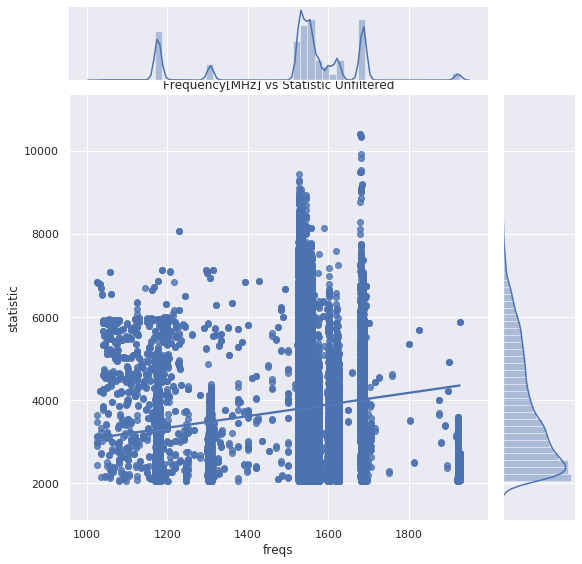

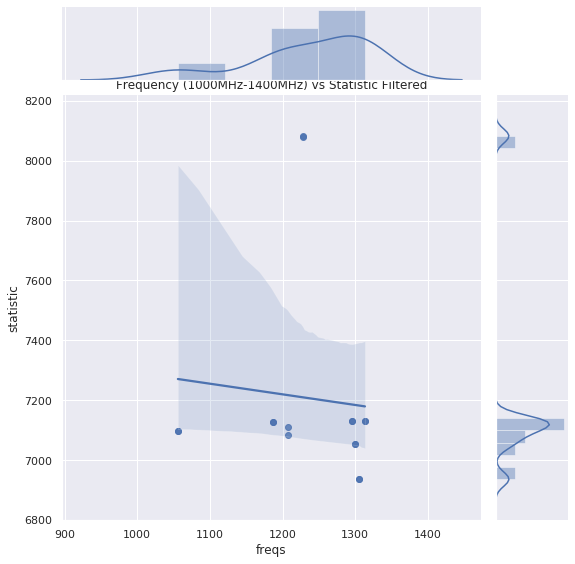

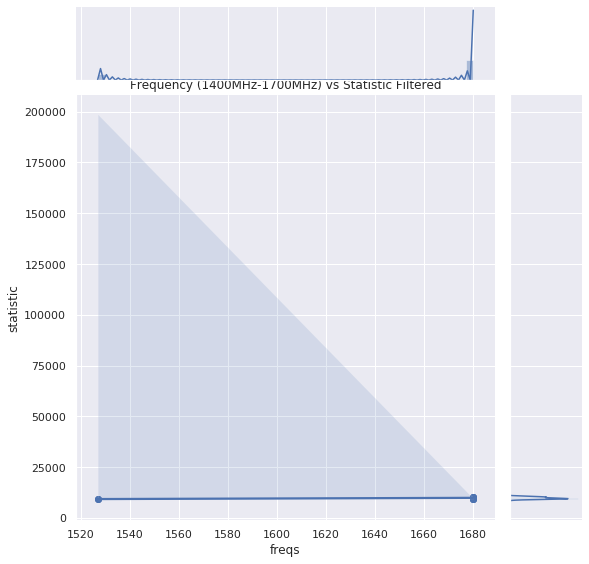

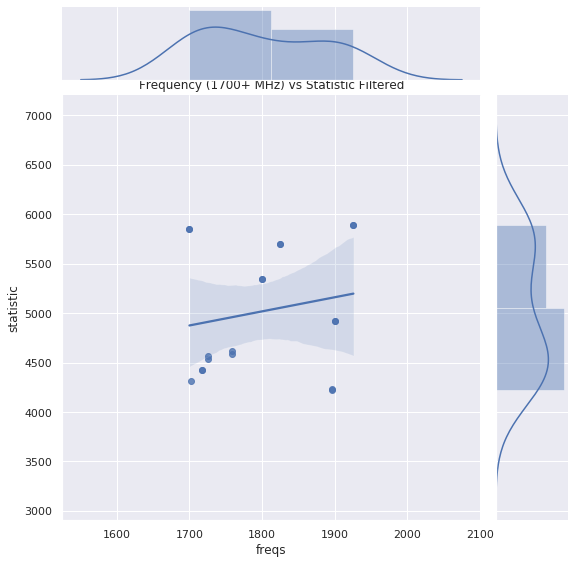

In [155]:
sns.jointplot(x="freqs",y="statistic",data=ob8, height=8, kind="reg")
plt.title("Frequency[MHz] vs Statistic Unfiltered")
sns.jointplot(x="freqs", y="statistic", data=extr_1000_1400_8, height=8, kind="reg")
plt.title("Frequency (1000MHz-1400MHz) vs Statistic Filtered")
sns.jointplot(x="freqs", y="statistic", data=extr_1400_1700_8, height=8, kind="reg")
plt.title("Frequency (1400MHz-1700MHz) vs Statistic Filtered")
sns.jointplot(x="freqs", y="statistic", data=extr_1700_8, height=8, kind="reg")
plt.title("Frequency (1700+ MHz) vs Statistic Filtered")

# Observation 9 #

In [75]:
ob9 = pd.read_pickle("GBT_58307_26947_J1935+1616_fine_info_df.pkl")
ob9

,index,statistic,pvalue,block_num,freqs
0,293762980,2494.989847,0.0,10,1105.505247
1,293763080,2437.733207,0.0,10,1105.504967
2,293763780,5076.331107,0.0,10,1105.503011
3,293763880,5090.861699,0.0,10,1105.502732
4,294676056,3244.276559,0.0,10,1102.954142
...,...,...,...,...,...
66968,173345540,6555.012130,0.0,5,1441.947687
66969,173345640,6555.869009,0.0,5,1441.947408
66970,173345740,6479.317693,0.0,5,1441.947129
66971,173345840,6476.008730,0.0,5,1441.946849


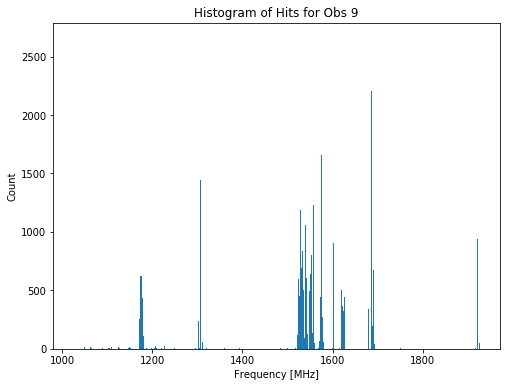

In [76]:
plt.figure(figsize=(8,6))
plt.hist(ob9["freqs"], bins = np.arange(min(ob9["freqs"]),max(ob9["freqs"]), 0.8116025973))

plt.title("Histogram of Hits for Obs 9")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Count")

pic_IObytes = io.BytesIO()
plt.savefig(pic_IObytes,  format='png')
pic_IObytes.seek(0)
pic_hash = base64.b64encode(pic_IObytes.read())

In [77]:
pic_hash

b'iVBORw0KGgoAAAANSUhEUgAAAkAAAAGwCAYAAABB4NqyAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nO3df1RVdaL//9cR0jREI4VAUKDDqKFICKg1aalI4yRl+TNLHSq7VuPth5Z3upU6mUz2w8asFXco0elK2R1lKkXLcqZSB5n0ttLKk4EpclUEFUoR8P39w2/7EwEOKZ4DvZ+PtVwL3mf/eO/dKZ/ts885LmOMEQAAgEXa+HoCAAAA3kYAAQAA6xBAAADAOgQQAACwDgEEAACsQwABAADrEEAAAMA6BBAAALAOAQQAAKxDAAEAAOsQQAAAwDoEEAAAsA4BBAAArEMAAQAA6xBAAADAOgQQAACwDgEEAACsQwABAADrEEAAAMA6BBAAALAOAQQAAKxDAAEAAOsQQAAAwDoEEAAAsA4BBAAArEMAAQAA6xBAAADAOgQQAACwDgEEAACsQwABAADrEEAAAMA6BBAAALAOAQQAAKxDAAEAAOsQQAAAwDoEEOAjsbGx2rhxo6+n4VOrVq1SRESEAgICtG3btrPaRkBAgL7++utznsvx48c1atQoderUSWPHjj3n7TVVZGSk3nvvPa/tD8BpBBBwHjT0l9rSpUv1y1/+0vl9x44duuaaa864naKiIrlcLtXU1JyPafrczJkz9cILL6iyslJXXHFFvcddLpe++uqrOmNz5szRrbfe6vxeWVmp6OhoSdLUqVP1n//5n2c1lzfffFMHDhzQ4cOHtXLlyrPaxo8dOXJE06dP16WXXqoOHTqob9++evXVV5tl2z+2adMmJScnq2PHjoqLi9NHH310XvYD/FwQQIDFfB1We/bsUWxsrE/n8L09e/boF7/4hfz9/X/yug2dx5

In [78]:
#Filter to freq range between 1000 and 1400
freq_1000_1400_9 = ob9[(ob9["freqs"] > 1000) & (ob9["freqs"] <= 1400)]

#Find the mean statistic within this range
mean_stat_1000_1400_9 = np.mean(freq_1000_1400_9["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1000_1400_9 = np.std(freq_1000_1400_9["statistic"])

#The most extreme samples, greater than 9 standard deviations from mean statistic
extr_1000_1400_9 = freq_1000_1400_9[freq_1000_1400_9["statistic"] >= 7*std_stat_1000_1400_9]
extr_1000_1400_9

,index,statistic,pvalue,block_num,freqs
97,309147544,6356.369483,0.0,10,1062.521271
124,311484472,6285.514847,0.0,10,1055.991970
181,215338980,7466.868880,0.0,7,1324.619371
182,215339080,7462.713083,0.0,7,1324.619092
4348,224456664,6783.669384,0.0,7,1299.144857
4349,224456764,6785.036141,0.0,7,1299.144577
4350,225505240,7265.707171,0.0,7,1296.215169
4351,225505340,7265.611620,0.0,7,1296.214890
47563,193864184,8463.694149,0.0,6,1384.619258
47564,193864284,8469.940795,0.0,6,1384.618979


In [79]:
#Filter to freq range between 1400 and 1700
freq_1400_1700_9 = ob9[(ob9["freqs"] > 1400) & (ob9["freqs"] <= 1700)]

#Find the mean statistic within this range
mean_stat_1400_1700_9 = np.mean(freq_1400_1700_9["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1400_1700_9 = np.std(freq_1400_1700_9["statistic"])

#The most extreme samples, greater than 7 standard deviations from mean statistic
extr_1400_1700_9 = freq_1400_1700_9[freq_1400_1700_9["statistic"] >= 7*std_stat_1400_1700_9]
extr_1400_1700_9

,index,statistic,pvalue,block_num,freqs
27943,136778180,9964.938754,0.0,4,1544.115711
27994,136790880,9966.904005,0.0,4,1544.080228
27995,136790980,9809.674910,0.0,4,1544.079948
31914,140339808,9922.547310,0.0,4,1534.164637
46185,143338436,10010.723930,0.0,4,1525.786567
46186,143338536,10179.371531,0.0,4,1525.786288
46315,143351436,9923.528745,0.0,4,1525.750246
46316,143351536,9888.637297,0.0,4,1525.749967
46724,143392336,9943.963319,0.0,4,1525.635973


In [80]:
#Filter to freq range greater than 1700
freq_1700_9 = ob9[ob9["freqs"] > 1700]

#Find the mean statistic within this range
mean_stat_1700_9 = np.mean(freq_1700_9["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1700_9 = np.std(freq_1700_9["statistic"])

#The most extreme samples, greater than 7 standard deviations from mean statistic
extr_1700_9 = freq_1700_9[freq_1700_9["statistic"] >= 9*std_stat_1700_9]
extr_1700_9

,index,statistic,pvalue,block_num,freqs
4400,96300,5893.977033,0.0,0,1926.000472
4401,96400,5894.683783,0.0,0,1926.000193
7097,9402108,4848.606167,0.0,0,1900.000345
7098,9402208,4847.884772,0.0,0,1900.000066
59180,63094360,4584.014479,0.0,2,1749.985926
59181,63094460,4407.011551,0.0,2,1749.985646
59182,63094560,4708.406378,0.0,2,1749.985367
59185,80984852,5811.185125,0.0,2,1700.000469
59186,80984952,5811.216074,0.0,2,1700.000189
66733,45193468,5279.288140,0.0,1,1800.000440


In [81]:
sample_urls_9 = get_img_url(extr_1000_1400_9, "GBT_58307_26947_J1935+1616_fine") + get_img_url(extr_1400_1700_9, "GBT_58307_26947_J1935+1616_fine") + get_img_url(extr_1700_9, "GBT_58307_26947_J1935+1616_fine")
sample_urls_9

['https://storage.cloud.google.com/bl-scale/GBT_58307_26947_J1935+1616_fine/filtered/10/309147544.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58307_26947_J1935+1616_fine/filtered/10/311484472.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58307_26947_J1935+1616_fine/filtered/7/215338980.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58307_26947_J1935+1616_fine/filtered/7/215339080.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58307_26947_J1935+1616_fine/filtered/7/224456664.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58307_26947_J1935+1616_fine/filtered/7/224456764.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58307_26947_J1935+1616_fine/filtered/7/225505240.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58307_26947_J1935+1616_fine/filtered/7/225505340.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58307_26947_J1935+1616_fine/filtered/6/193864184.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58307_26947_J1935+1616_

Text(0.5, 1, 'Frequency (1700+ MHz) vs Statistic Filtered')

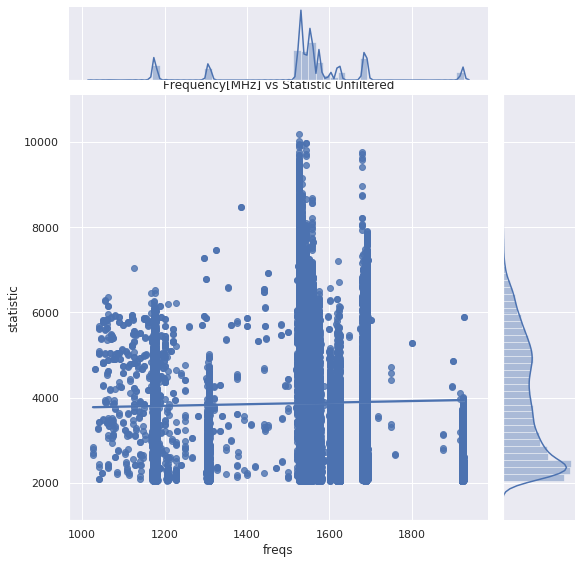

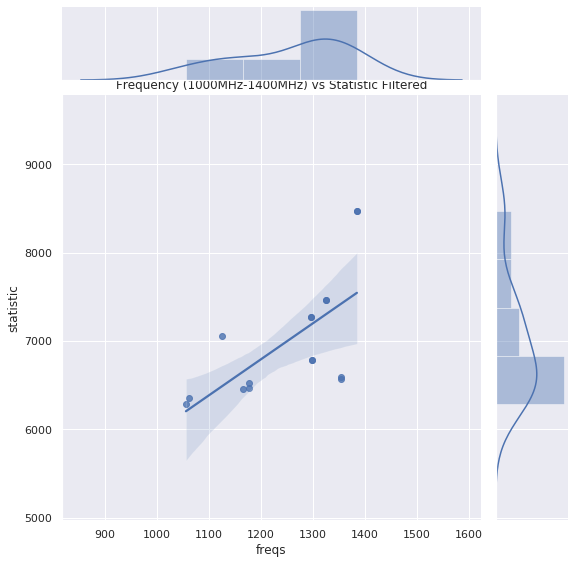

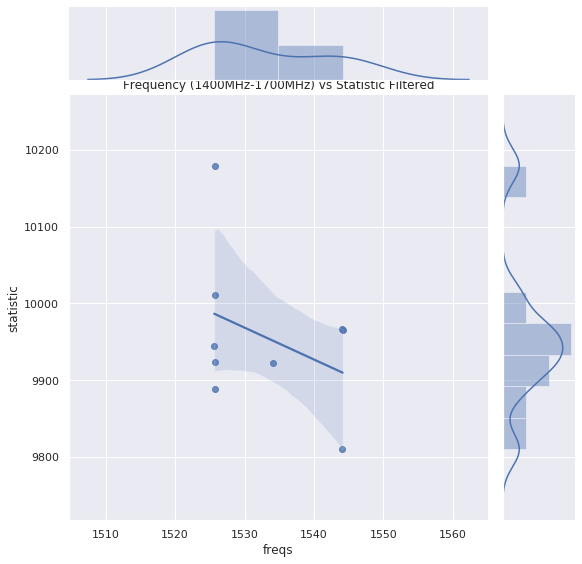

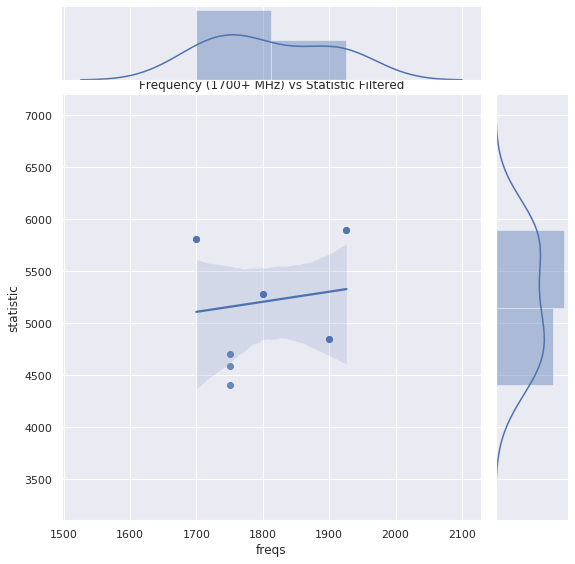

In [156]:
sns.jointplot(x="freqs",y="statistic",data=ob9, height=8, kind="reg")
plt.title("Frequency[MHz] vs Statistic Unfiltered")
sns.jointplot(x="freqs", y="statistic", data=extr_1000_1400_9, height=8, kind="reg")
plt.title("Frequency (1000MHz-1400MHz) vs Statistic Filtered")
sns.jointplot(x="freqs", y="statistic", data=extr_1400_1700_9, height=8, kind="reg")
plt.title("Frequency (1400MHz-1700MHz) vs Statistic Filtered")
sns.jointplot(x="freqs", y="statistic", data=extr_1700_9, height=8, kind="reg")
plt.title("Frequency (1700+ MHz) vs Statistic Filtered")

# Observation 10#

In [82]:
ob10 = pd.read_pickle("GBT_58452_79191_HIP115687_fine_info_df.pkl")
ob10

,index,statistic,pvalue,block_num,freqs
0,293762980,2482.453922,0.0,10,1105.505247
1,293763080,2484.643991,0.0,10,1105.504967
2,293763780,5780.915363,0.0,10,1105.503011
3,293763880,5785.568556,0.0,10,1105.502732
4,293943680,4026.482980,0.0,10,1105.000377
...,...,...,...,...,...
76973,174943616,3545.058613,0.0,5,1437.482715
76974,174943716,3451.894207,0.0,5,1437.482435
76975,175651792,4587.990271,0.0,5,1435.504094
76976,175651892,4516.558522,0.0,5,1435.503814


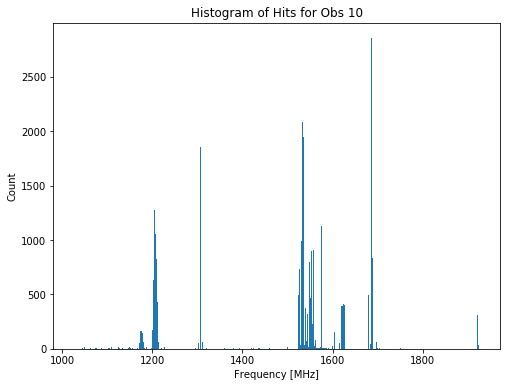

In [83]:
plt.figure(figsize=(8,6))
plt.hist(ob10["freqs"], bins = np.arange(min(ob10["freqs"]),max(ob10["freqs"]), 0.8116025973))

plt.title("Histogram of Hits for Obs 10")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Count")

pic_IObytes = io.BytesIO()
plt.savefig(pic_IObytes,  format='png')
pic_IObytes.seek(0)
pic_hash = base64.b64encode(pic_IObytes.read())

In [84]:
pic_hash

b'iVBORw0KGgoAAAANSUhEUgAAAkAAAAGwCAYAAABB4NqyAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nO3df1iUZaL/8c8IaRqikULgoEBD/kCREPzRD60UKVupzFBjUxfLjtXa5mp5tmOppbKZZavWibOW6JqUnVWOpaJZtm1pSGldaeWkYogclPAHuIqiz/cPT89XBAwVZ8D7/bqurkvumWfmfu6mePs8z8w4LMuyBAAAYJBG3p4AAACApxFAAADAOAQQAAAwDgEEAACMQwABAADjEEAAAMA4BBAAADAOAQQAAIxDAAEAAOMQQAAAwDgEEAAAMA4BBAAAjEMAAQAA4xBAAADAOAQQAAAwDgEEAACMQwABAADjEEAAAMA4BBAAADAOAQQAAIxDAAEAAOMQQAAAwDgEEAAAMA4BBAAAjEMAAQAA4xBAAADAOAQQAAAwDgEEAACMQwABAADjEEAAAMA4BBAAADAOAQQAAIxDAAEAAOMQQAAAwDgEEAAAMA4BBHhIVFSU1q9f7+1peNWyZcsUGhoqPz8/bd68+YIew8/PTzt37rzouRw9elQDBw5UixYtdP/991/049VWWFiYPvzwQ489H4DqEUBAHajul9qCBQt088032z9v3bpVt9566zkfJy8vTw6HQxUVFZdiml43fvx4zZ07V2VlZbrhhhuq3O5wOPTjjz9WGps8ebJ++9vf2j+XlZUpIiJCkjRy5Ej9x3/8xwXN5b333lNRUZF+/vlnLV269IIe42wHDx7UmDFjdO2116pZs2bq0qWL3nrrrTp57LNNmjRJXbp0ka+vryZPnlzl9rffflvt2rXTVVddpXvuuUclJSWXZB5AQ0UAAQbxdljt3r1bUVFRXp3DL3

In [85]:
#Filter to freq range between 1000 and 1400
freq_1000_1400_10 = ob10[(ob10["freqs"] > 1000) & (ob10["freqs"] <= 1400)]

#Find the mean statistic within this range
mean_stat_1000_1400_10 = np.mean(freq_1000_1400_10["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1000_1400_10 = np.std(freq_1000_1400_10["statistic"])

#The most extreme samples, greater than 10 standard deviations from mean statistic
extr_1000_1400_10 = freq_1000_1400_10[freq_1000_1400_10["statistic"] >= 8*std_stat_1000_1400_10]
extr_1000_1400_10

,index,statistic,pvalue,block_num,freqs
268,212253552,6900.908254,0.0,7,1333.239958
269,212253652,6905.466689,0.0,7,1333.239678
43232,197319588,6496.537560,0.0,6,1374.964971
43233,197319688,6495.123974,0.0,6,1374.964692
48773,264709652,6713.294679,0.0,9,1186.679307
50487,272032784,8020.970371,0.0,9,1166.218713
64360,250064488,6520.679011,0.0,8,1227.597423
64361,250064588,6519.639200,0.0,8,1227.597144
69009,257128220,6933.303460,0.0,8,1207.861584
69138,257162220,6838.247339,0.0,8,1207.766589


In [86]:
#Filter to freq range between 1400 and 1700
freq_1400_1700_10 = ob10[(ob10["freqs"] > 1400) & (ob10["freqs"] <= 1700)]

#Find the mean statistic within this range
mean_stat_1400_1700_10 = np.mean(freq_1400_1700_10["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1400_1700_10 = np.std(freq_1400_1700_10["statistic"])

#The most extreme samples, greater than 7 standard deviations from mean statistic
extr_1400_1700_10 = freq_1400_1700_10[freq_1400_1700_10["statistic"] >= 7*std_stat_1400_1700_10]
extr_1400_1700_10

,index,statistic,pvalue,block_num,freqs
28187,139930408,9645.675118,0.0,4,1535.308488
43255,88128484,9659.179679,0.0,3,1680.041391
43256,88128584,9665.746435,0.0,3,1680.041112
43269,88130184,9635.994162,0.0,3,1680.036642
43270,88130284,9747.863880,0.0,3,1680.036362
43340,88147884,9603.096846,0.0,3,1679.987188
43341,88147984,9556.403660,0.0,3,1679.986909
43476,88178184,10020.633979,0.0,3,1679.902531
43477,88178284,9747.110380,0.0,3,1679.902252
43492,88182484,9578.215636,0.0,3,1679.890517


In [87]:
#Filter to freq range greater than 1700
freq_1700_10 = ob10[ob10["freqs"] > 1700]

#Find the mean statistic within this range
mean_stat_1700_10 = np.mean(freq_1700_10["statistic"])

#Find the standard deviation of the statistic within this range
std_stat_1700_10 = np.std(freq_1700_10["statistic"])

#The most extreme samples, greater than 7 standard deviations from mean statistic
extr_1700_10 = freq_1700_10[freq_1700_10["statistic"] >= 10*std_stat_1700_10]
extr_1700_10

,index,statistic,pvalue,block_num,freqs
4477,96300,5815.911474,0.0,0,1926.000472
4478,96400,5814.557261,0.0,0,1926.000193
6242,27049100,5445.794205,0.0,0,1850.695219
6243,27049200,5445.740886,0.0,0,1850.694939
50675,60084332,7092.163375,0.0,2,1758.395847
50676,60084432,7057.856031,0.0,2,1758.395568
50703,79609600,6139.016868,0.0,2,1703.842878
50864,80561376,5847.489089,0.0,2,1701.183647
50873,80984852,5896.718732,0.0,2,1700.000469
50874,80984952,5896.732772,0.0,2,1700.000189


In [88]:
sample_urls_10 = get_img_url(extr_1000_1400_10, "GBT_58452_79191_HIP115687_fine") + get_img_url(extr_1400_1700_10, "GBT_58452_79191_HIP115687_fine") + get_img_url(extr_1700_10, "GBT_58452_79191_HIP115687_fine")
sample_urls_10

['https://storage.cloud.google.com/bl-scale/GBT_58452_79191_HIP115687_fine/filtered/7/212253552.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58452_79191_HIP115687_fine/filtered/7/212253652.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58452_79191_HIP115687_fine/filtered/6/197319588.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58452_79191_HIP115687_fine/filtered/6/197319688.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58452_79191_HIP115687_fine/filtered/9/264709652.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58452_79191_HIP115687_fine/filtered/9/272032784.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58452_79191_HIP115687_fine/filtered/8/250064488.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58452_79191_HIP115687_fine/filtered/8/250064588.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58452_79191_HIP115687_fine/filtered/8/257128220.png',
 'https://storage.cloud.google.com/bl-scale/GBT_58452_79191_HIP115687_fine/filtere

Text(0.5, 1, 'Frequency (1700+ MHz) vs Statistic Filtered')

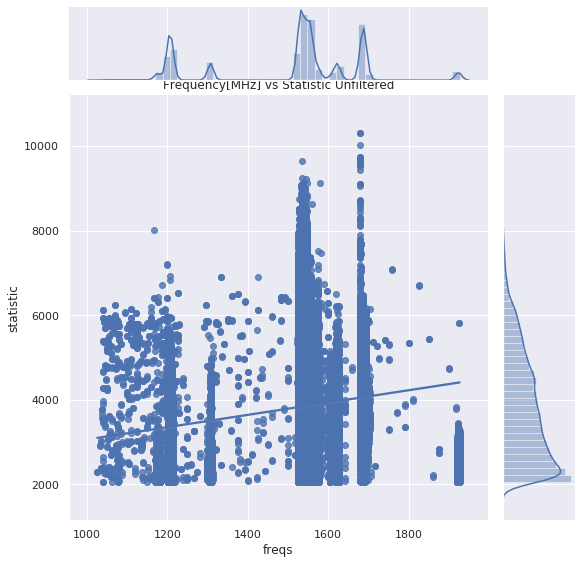

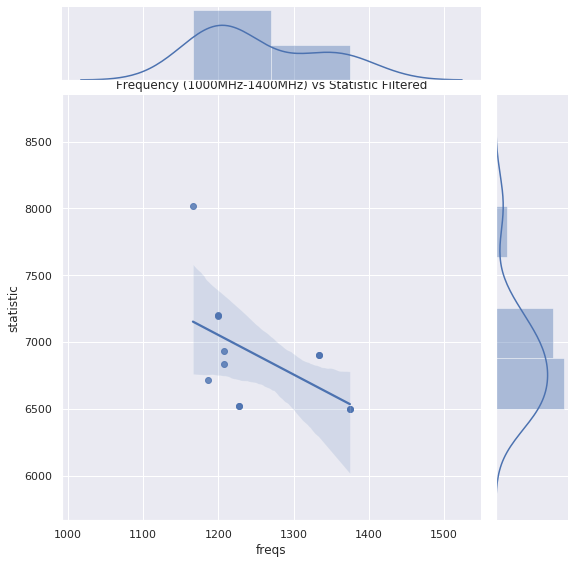

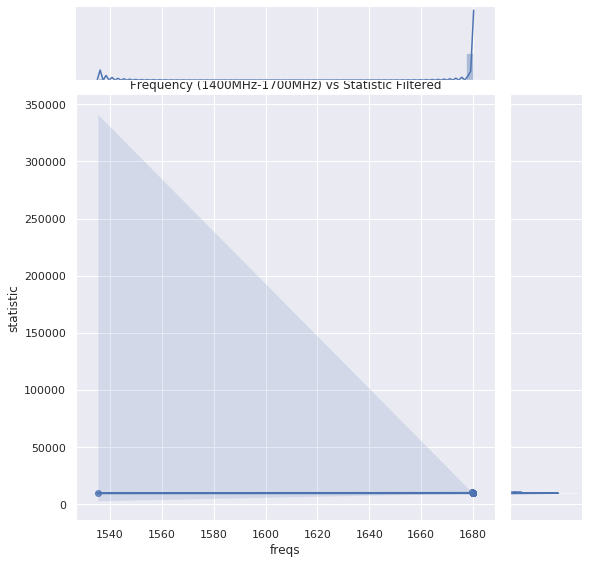

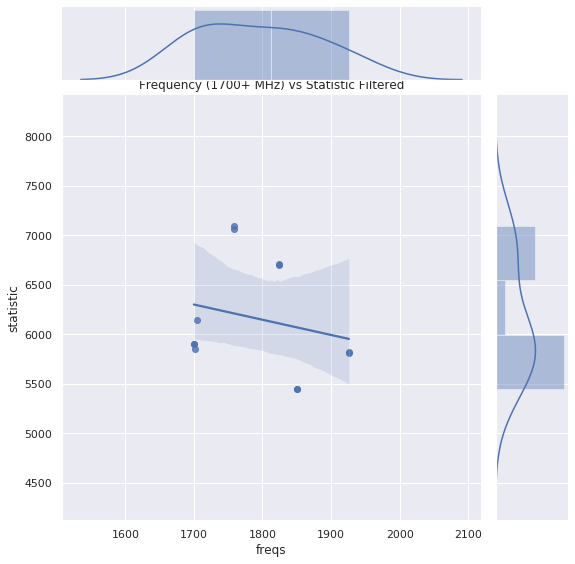

In [157]:
sns.jointplot(x="freqs",y="statistic",data=ob10, height=8, kind="reg")
plt.title("Frequency[MHz] vs Statistic Unfiltered")
sns.jointplot(x="freqs", y="statistic", data=extr_1000_1400_10, height=8, kind="reg")
plt.title("Frequency (1000MHz-1400MHz) vs Statistic Filtered")
sns.jointplot(x="freqs", y="statistic", data=extr_1400_1700_10, height=8, kind="reg")
plt.title("Frequency (1400MHz-1700MHz) vs Statistic Filtered")
sns.jointplot(x="freqs", y="statistic", data=extr_1700_10, height=8, kind="reg")
plt.title("Frequency (1700+ MHz) vs Statistic Filtered")

In [95]:
sample_urls = {'GBT_58010_50176_HIP61317_fine': samples_url_1, 'GBT_58014_69579_HIP77629_fine': samples_url_2, 'GBT_58110_60123_HIP91926_fine':sample_urls_3, 'GBT_58202_60970_B0329+54_fine':sample_urls_4,
                        'GBT_58210_37805_HIP103730_fine': sample_urls_5, 'GBT_58210_39862_HIP105504_fine': sample_urls_6, 'GBT_58210_40853_HIP106147_fine':sample_urls_7, 'GBT_58210_41185_HIP105761_fine': sample_urls_8,
                        'GBT_58307_26947_J1935+1616_fine':sample_urls_9, 'GBT_58452_79191_HIP115687_fine':sample_urls_10}
sample_urls_keys = list(sample_urls.keys())
sample_urls_keys

['GBT_58010_50176_HIP61317_fine',
 'GBT_58014_69579_HIP77629_fine',
 'GBT_58110_60123_HIP91926_fine',
 'GBT_58202_60970_B0329+54_fine',
 'GBT_58210_37805_HIP103730_fine',
 'GBT_58210_39862_HIP105504_fine',
 'GBT_58210_40853_HIP106147_fine',
 'GBT_58210_41185_HIP105761_fine',
 'GBT_58307_26947_J1935+1616_fine',
 'GBT_58452_79191_HIP115687_fine']